###  **Import**

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### **Load data**

In [2]:
df_status = pd.read_csv ('Database/movie_ticket_data/status_detail.csv')
df_cus = pd.read_csv ('Database/movie_ticket_data/customer.csv')
df_campaign = pd.read_csv ('Database/movie_ticket_data/campaign.csv')
df_device = pd.read_csv ('Database/movie_ticket_data/device_detail.csv')
df_ticket = pd.read_csv ('Database/movie_ticket_data/ticket_history.csv')

### Realated function

In [3]:
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

# **1.Cleaning data**


### 1.1 Check datatype, null, duplicates:

#### df_cus table:

In [4]:
df_cus.head (5)

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [5]:
df_cus.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [6]:
#change dob into date-time
df_cus['dob'] = pd.to_datetime(df_cus['dob'])

#### df_ticket table:

In [7]:
df_ticket.head (5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [8]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [9]:
#change time into date-time
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [10]:
#check null value and null_rate
calc_null_rate (df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [11]:
#check model null value
df_device[df_device['model'].isnull()]

,device_number,model,platform
12,0007777fefd1d769894d770c9bc0e4f7,NaN,website
14,0008b884b90d5558aee4668b8170b184,NaN,website
86,002e8cb646ab95dd4b8e0fe3032cd316,NaN,mobile
99,00360746729b1024191b8d1384f8a92f,NaN,mobile
114,003f2a9fa1e8539848ea16ed70e7fa6d,NaN,website
...,...,...,...
139795,ffce8c03b2193915c9e4c22b41d77638,NaN,website
139822,ffd954a137299efd83ae583689017778,NaN,mobile
139826,ffdbd3e53ed626af4437fa281b0c6caf,NaN,mobile
139869,ffeebba07a77b4e53e4acbeff855450d,NaN,mobile


In [12]:
#fill model null value --> 'unknown'
df_device['model'].fillna('unknown',inplace = True)

In [13]:
#check device# null value
df_device[df_device['device_number'].isnull()]

,device_number,model,platform
139901,NaN,browser,website


In [14]:
#We have no idea about this device --> drop device# null
df_device = df_device [df_device ['device_number'].notna()]

In [15]:
df_ticket.info ()
df_ticket.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154827 non-null  object        
 1   customer_id     154827 non-null  int64         
 2   paying_method   154827 non-null  object        
 3   theater_name    154827 non-null  float64       
 4   device_number   154827 non-null  object        
 5   original_price  154827 non-null  float64       
 6   discount_value  154827 non-null  float64       
 7   final_price     154827 non-null  float64       
 8   time            154827 non-null  datetime64[ns]
 9   status_id       154827 non-null  int64         
 10  campaign_id     154827 non-null  int64         
 11  movie_name      154827 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 14.2+ MB


ticket_id         154725
customer_id       119477
paying_method          5
theater_name         179
device_number     126459
original_price      1895
discount_value       242
final_price         2715
time              154725
status_id              8
campaign_id          211
movie_name           253
dtype: int64

In [16]:
#check duplicated ticket_id
df_ticket [df_ticket['ticket_id'].duplicated(keep = False)]

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
...,...,...,...,...,...,...,...,...,...,...,...,...
150907,19157b98a57ed878fb487d8513c5990b,208867,bank account,109.0,52933d84749f4b41e9b3458f373e7022,5.36,2.52,2.84,2022-04-12 15:53:18.845,1,73240,Jujutsu Kaisen 0
150908,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150909,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150910,ee8873f48b7a45d5a979f0b425a95838,224834,money in app,119.0,957be8a5460e76997e6802bccd969511,20.62,4.62,16.00,2022-05-07 07:22:33.411,1,73240,Jujutsu Kaisen 0


In [17]:
#The duplication does not show any special details --> drop duplicated row
df_ticket.drop_duplicates(inplace = True)

### **1.2 Join all table**

In [18]:
#Merge table
pd_ticket_stat = pd.merge (df_ticket, df_status, how = 'left', on = 'status_id')
pd_ticket_device = pd.merge (pd_ticket_stat, df_device , how = 'left', on = 'device_number')
pd_ticket_cus = pd.merge (pd_ticket_device, df_cus , how = 'left', on = 'customer_id')
df_join_all = pd.merge (pd_ticket_cus, df_campaign , how = 'left', on = 'campaign_id')


In [19]:
df_join_all.info()
df_join_all.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  description     154725 non-null  object        
 13  error_group     21046 non-null   object        
 14  model           154647 non-null  obj

ticket_id         154725
customer_id       119477
paying_method          5
theater_name         179
device_number     126459
original_price      1895
discount_value       242
final_price         2715
time              154725
status_id              8
campaign_id          211
movie_name           253
description            8
error_group            3
model               1215
platform               2
usergender             3
dob                11322
campaign_type          3
dtype: int64

In [20]:
# Quick check about value of each column
specific_cols = ['movie_name','theater_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

# **2.Customer portrait**

### **2.1 Age and gender distribution:**

In [21]:
df_join_all.head(1)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.9,2.1,7.8,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount


In [22]:
#caculate the age
current_date = datetime (2023,1,1,0,0) # the day of data recorded
df_join_all ['age_date'] = (current_date - df_join_all ['dob']).dt.days
df_join_all ['age'] = df_join_all ['age_date'] /365.25
df_join_all ['age'] = df_join_all ['age'].astype(int)

In [23]:
df_join_all.info()
df_join_all.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  description     154725 non-null  object        
 13  error_group     21046 non-null   object        
 14  model           154647 non-null  obj

ticket_id         154725
customer_id       119477
paying_method          5
theater_name         179
device_number     126459
original_price      1895
discount_value       242
final_price         2715
time              154725
status_id              8
campaign_id          211
movie_name           253
description            8
error_group            3
model               1215
platform               2
usergender             3
dob                11322
campaign_type          3
age_date           11322
age                  106
dtype: int64

In [24]:
#Check again the df_cus
df_cus = df_join_all.drop_duplicates(subset = ['customer_id'])[['customer_id', 'usergender', 'age', 'dob']]
df_cus.head (5)

,customer_id,usergender,age,dob
0,100009,Male,33,1989-02-25
1,100493,Male,31,1991-06-09
2,100596,Male,33,1989-05-18
3,100852,Male,25,1997-08-31
4,100965,Male,34,1988-09-20


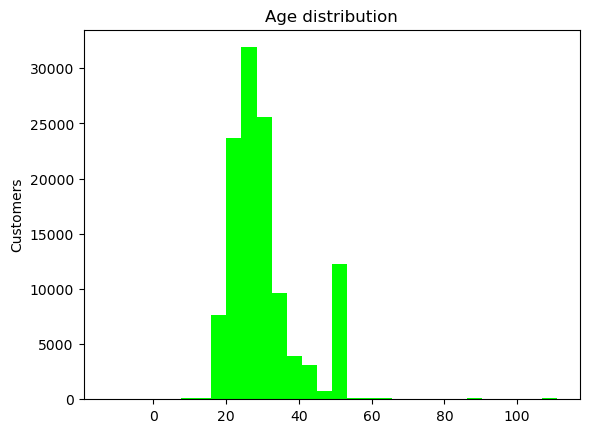

In [25]:
#plot historam
df_cus.hist('age', grid = False, bins = 30, color = 'lime')
plt.title ('Age distribution')
plt.ylabel ('Customers')
plt.show ()

**NOTE:**

- It is normal distribution in the age range (10,50).
- There is a significant number of age around 50-60 ? --> check is there any technical fraud while recording the data.

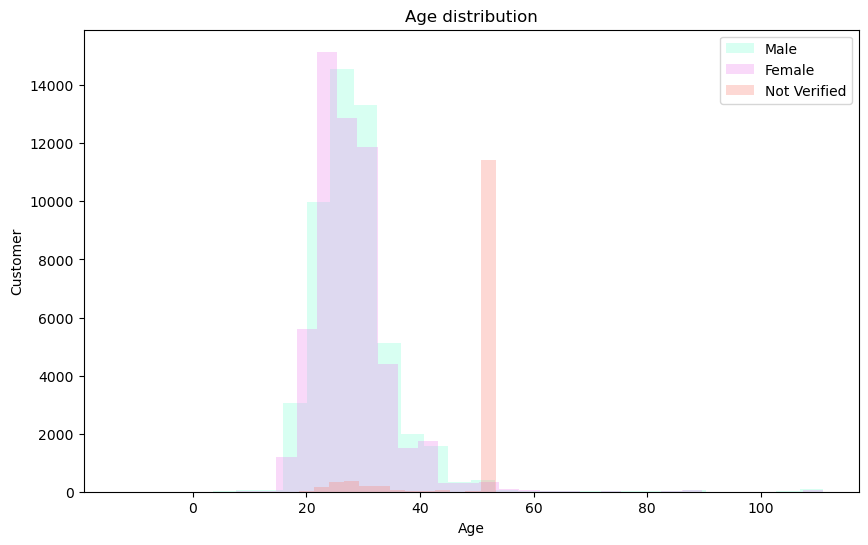

In [26]:
#gender distribution
male_age = df_cus [df_cus['usergender'] == 'Male'] ['age']
female_age = df_cus [df_cus['usergender'] == 'Female'] ['age']
other_age = df_cus [df_cus['usergender'] == 'Not verify'] ['age']

#plot hist for each gender
plt.figure (figsize = ( 10,6))
plt.hist(male_age, bins = 30, color = 'aquamarine', alpha = 0.3, label = 'Male')
plt.hist(female_age, bins = 30, color = 'violet', alpha = 0.3, label = 'Female')
plt.hist(other_age, bins = 30, color = 'salmon', alpha = 0.3, label = 'Not Verified')
#decoration
plt.title ('Age distribution')
plt.ylabel ('Customer')
plt.xlabel ('Age')
plt.legend (loc = 'upper right')
plt.show()

In [27]:
#check thoroughly the gender quantity
df_gen = df_cus.groupby('usergender').agg(total_cus = ('customer_id','count')).sort_values ('total_cus', ascending = False).reset_index()
df_gen

,usergender,total_cus
0,Female,55689
1,Male,50873
2,Not verify,12915


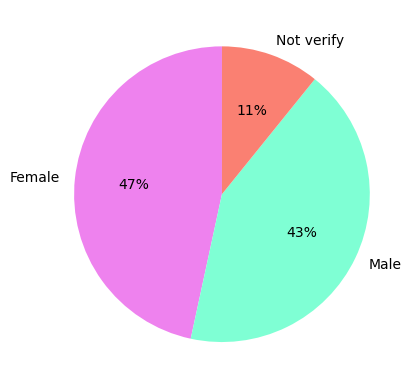

In [28]:
#pie chart
plt.pie (df_gen ['total_cus'], labels = df_gen['usergender'], colors=['violet', 'aquamarine', 'salmon' ], startangle=90, autopct= '%1.0f%%')
plt.show()

In [29]:
#check the age of 'not verified" group
df_cus[df_cus['usergender']=='Not verify'].groupby('age')\
.agg(total_cus = ('customer_id','count') )\
.sort_values ('total_cus', ascending = False)\
.head(5)

,total_cus
age,
52,11434
27,135
29,118
25,117
24,115


**Note**

* 'Not verify' group maybe coming from 2 situations:
    1. If customer does not enter gender, the system auto fill birth year '1970'.
    2. Cus not verify their account.


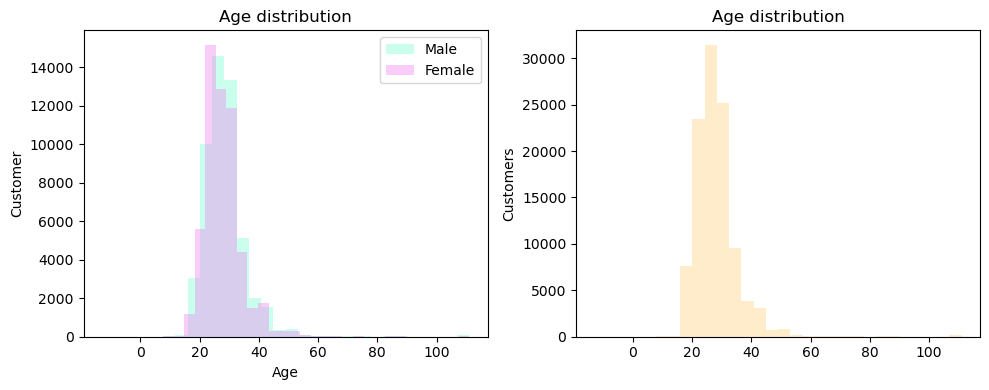

In [30]:
#Age and Gender distribution (except not verify customer)
plt.figure(figsize = (10,4))
#plot age historam
ax1 = plt.subplot (1,2,2)
df_cus[df_cus ['usergender'] != 'Not verify'].hist('age', grid = False, bins = 30, color = 'moccasin', alpha = 0.7 ,ax = ax1)
plt.title ('Age distribution')
plt.ylabel ('Customers')
plt.tight_layout()
# plot gender histogram
ax2 = plt.subplot (1,2,1)
plt.hist(male_age, bins = 30, color = 'aquamarine', alpha = 0.4, label = 'Male' )
plt.hist(female_age, bins = 30, color = 'violet', alpha = 0.4, label = 'Female' )
#decoration
plt.title ('Age distribution')
plt.ylabel ('Customer')
plt.xlabel ('Age')
plt.legend (loc = 'upper right')
plt.tight_layout()
plt.show()

In [31]:
#check the age (exclude 'Not verify' group)
df_cus[df_cus['usergender']!='Not verify'].groupby('age')\
.agg(total_cus = ('customer_id','count') )\
.sort_values ('total_cus', ascending = False)\
.head(5)

,total_cus
age,
27,8608
26,7852
28,7783
29,7585
25,7195


In [32]:
#define the median of age distribution
male = male_age. median () 
print (f"The median of male age: {male}")

female = female_age. median () 
print (f"The median of female age: {female}")

The median of male age: 28.0
The median of female age: 27.0


**Note:**
- The top 5 in age range 25-29 which is in family-making period.

--> Deep and dive into generation to figure out suitable marketing method.

## 2.2 Generation distribution:

In [33]:
df_cus.head (5)

,customer_id,usergender,age,dob
0,100009,Male,33,1989-02-25
1,100493,Male,31,1991-06-09
2,100596,Male,33,1989-05-18
3,100852,Male,25,1997-08-31
4,100965,Male,34,1988-09-20


In [34]:
#Add "generation" column based on their dob 
df_cus ['generation'] = df_cus['dob'].apply(lambda x: 'Baby boomer' if x.year < 1965 else 'Gen X' if x.year < 1981 else 'Gen Y' if x.year < 1997 else 'Gen Z')
df_cus.head (5)

,customer_id,usergender,age,dob,generation
0,100009,Male,33,1989-02-25,Gen Y
1,100493,Male,31,1991-06-09,Gen Y
2,100596,Male,33,1989-05-18,Gen Y
3,100852,Male,25,1997-08-31,Gen Z
4,100965,Male,34,1988-09-20,Gen Y


In [35]:
#Count number of cus (excluding "not verify" group)
df = df_cus[df_cus['usergender']!= 'Not verify'].groupby('generation').agg(total_cus = ('customer_id','count')).sort_values ('total_cus', ascending = False).reset_index()
df

,generation,total_cus
0,Gen Y,63310
1,Gen Z,38401
2,Gen X,4261
3,Baby boomer,590


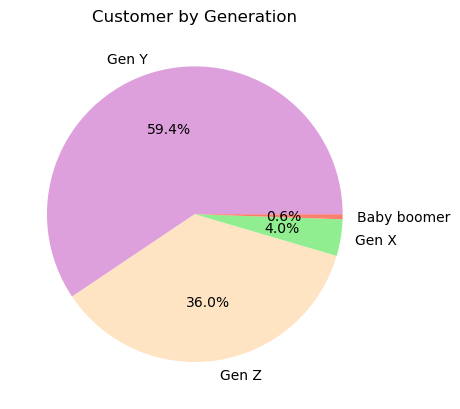

In [36]:
#plot the distribution of each gen
plt.pie (df['total_cus'], labels = df['generation'], autopct='%1.1f%%', colors = ['plum', 'bisque', 'lightgreen', 'salmon'])
plt.title ('Customer by Generation')
plt.show ()

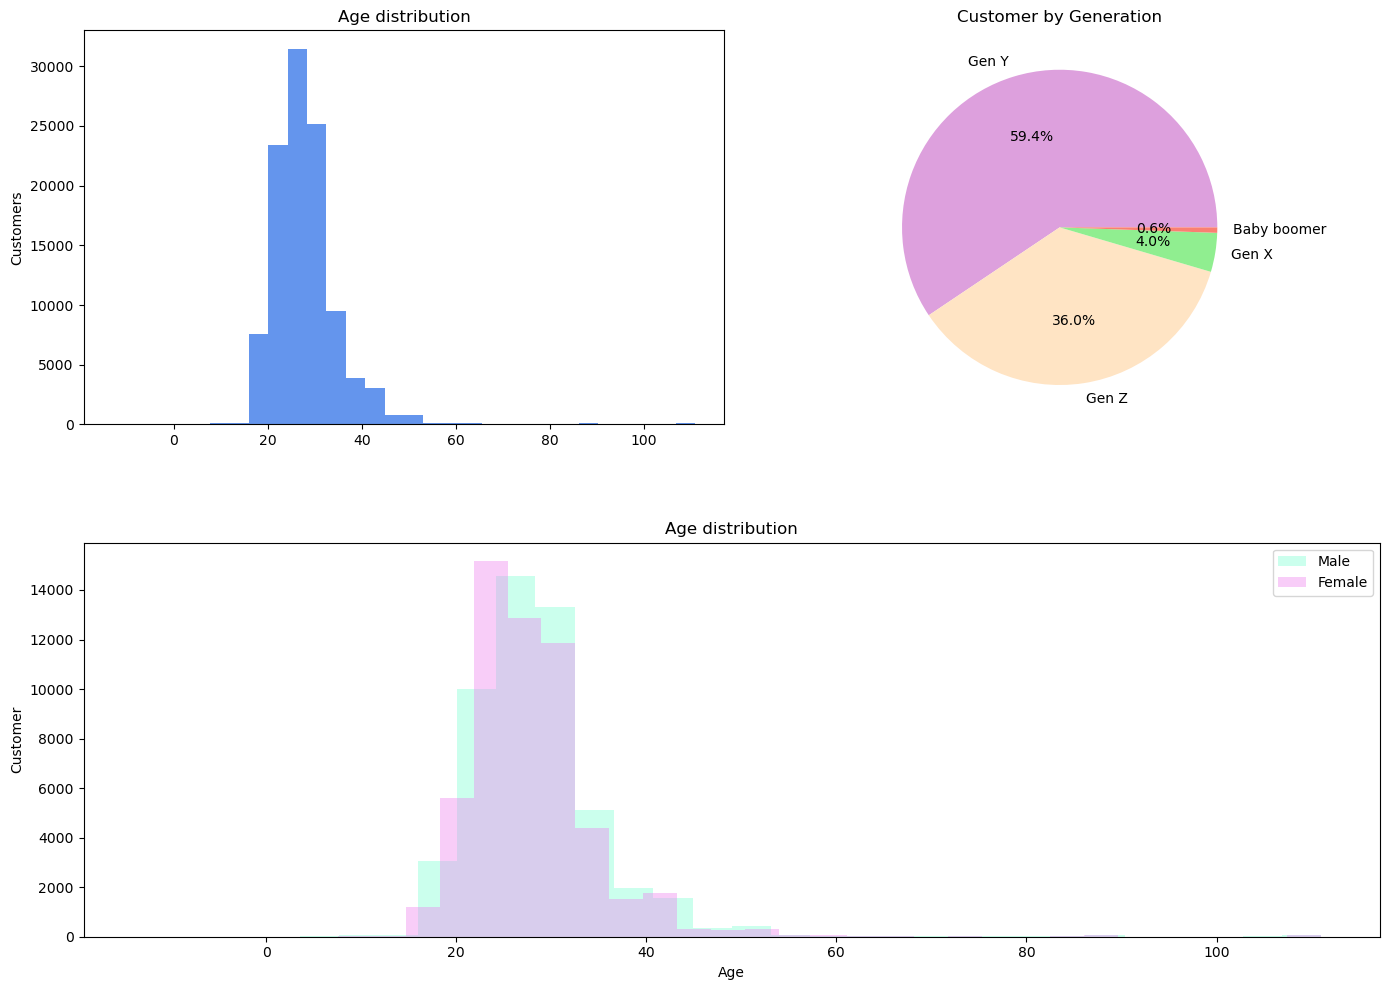

In [37]:
plt.figure (figsize = (14,10))
#histogram of age distribution
ax1 = plt.subplot (2,2,1)
df_cus[df_cus ['usergender'] != 'Not verify'].hist('age', grid = False, bins = 30, color = 'cornflowerblue', ax = ax1)
plt.title ('Age distribution')
plt.ylabel ('Customers')
plt.tight_layout()
#pie char of generation
ax2 = plt.subplot (2,2,2)
plt.pie (df['total_cus'], labels = df['generation'], autopct='%1.1f%%', colors = ['plum', 'bisque', 'lightgreen', 'salmon'])
plt.title ('Customer by Generation')
#histogram of gender distribution
ax3 = plt.subplot (2,1,2)
plt.hist(male_age, bins = 30, color = 'aquamarine', alpha = 0.4, label = 'Male' )
plt.hist(female_age, bins = 30, color = 'violet', alpha = 0.4, label = 'Female' )
#decoration
plt.title ('Age distribution')
plt.ylabel ('Customer')
plt.xlabel ('Age')
plt.legend (loc = 'upper right')
plt.tight_layout()

plt.subplots_adjust (hspace = 0.3)

**NOTE:**

* Most of customer in Gen-Y, in a family-making period. --> should have family discount or family-combo to maximize revenue.

* The age of male cus is 1-years older than female in general with the median: 28 - 27 respectively, it seems that they may go to cinema as couple (need verify this) --> Should have more couple-combo.

## **2.3 Time-series data:**

In [38]:
df_join_all['month'] = pd.to_datetime(df_join_all['time']).dt.month
df_join_all['day_name'] = df_join_all['time'].dt.day_name()
df_join_all['hour'] = df_join_all['time'].dt.hour
df_join_all ['year_month'] = df_join_all['time'].dt.strftime('%Y-%m')
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount,12363,33,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Order successful,NaN,browser,website,Male,1991-06-09,direct discount,11529,31,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Order successful,NaN,unknown,mobile,Male,1989-05-18,NaN,12281,33,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1997-08-31,direct discount,9254,25,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1988-09-20,direct discount,12521,34,7,Sunday,18,2022-07


In [39]:
## ticket sale by year_month
df_year_month = (df_join_all.groupby('year_month')
                  .agg(total_sale = ('ticket_id','count'))
                  .sort_values('year_month')
                  .reset_index())
df_year_month.head ()

,year_month,total_sale
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


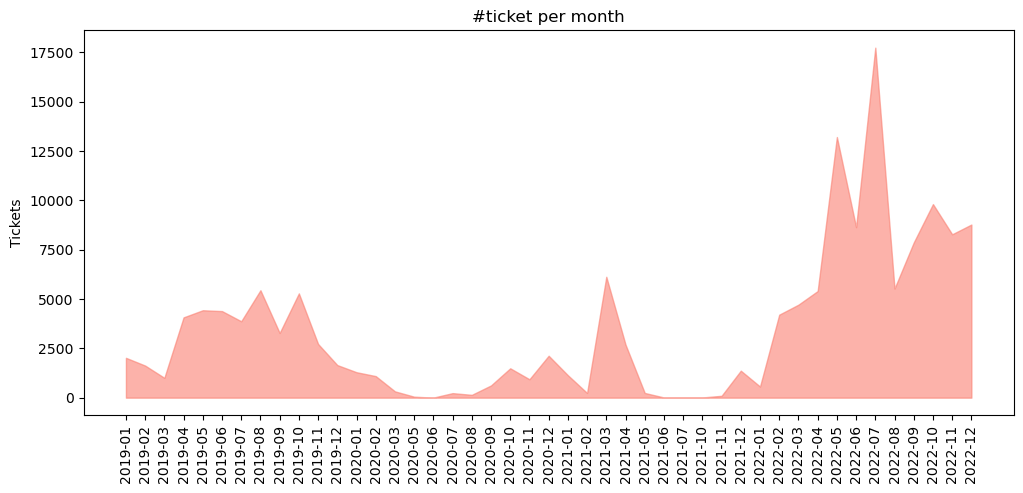

In [40]:
plt.figure (figsize =(12,5))
#Area graph for number of ticket by month
plt.fill_between (df_year_month['year_month'], df_year_month ['total_sale'], color = 'salmon', alpha = 0.6)
plt.title ('#ticket per month')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.show ()

In [41]:
#As can see, above table missing some month --> create a DIM_time then merge -> transfer 0 value to null
start_day = '2019-01'
end_day = '2022-12'
data_range = pd.date_range (start_day, end_day, freq = 'MS')
#list of month, month_name, year ,year_month
list_month = data_range.month
list_month_name = data_range.strftime('%B')
list_year = data_range.year
list_year_month = data_range.strftime ('%Y-%m')
#create DIM_time dataframe
dim_time = pd.DataFrame({
    'month' : list_month ,
    'month_name' : list_month_name,
    'year': list_year,
    'year_month':list_year_month
})
dim_time.head()

,month,month_name,year,year_month
0,1,January,2019,2019-01
1,2,February,2019,2019-02
2,3,March,2019,2019-03
3,4,April,2019,2019-04
4,5,May,2019,2019-05


In [42]:
dim_time_join = pd.merge (dim_time, df_join_all, how = 'left', on = 'year_month')
dim_time_join.head ()

,month_x,month_name,year,year_month,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month_y,day_name,hour
0,1,January,2019,2019-01,8a7f2cab8756e57def04ada487e988fd,100464.0,bank account,160.0,12fb2c927e118974e5760da6d23774f0,8.25,0.82,7.43,2019-01-03 18:39:23.087,1.0,14560.0,Aquaman,Order successful,NaN,HUAWEI ANE-LX2,mobile,Male,1988-05-17,voucher,12647.0,34.0,1.0,Thursday,18.0
1,1,January,2019,2019-01,c7ea0f76d90e2a53108b257d3a9f7b99,107065.0,money in app,92.0,5ab191f6212c82c12447b7b3e1d89275,10.31,9.49,0.82,2019-01-03 19:00:36.653,1.0,13740.0,Aquaman,Order successful,NaN,"iPhone5,2",mobile,Female,1994-05-24,reward point,10449.0,28.0,1.0,Thursday,19.0
2,1,January,2019,2019-01,379c51d5915607e94a375f9d9bdab650,107210.0,credit card,92.0,9ef86913f4326010ebb63e2df8f144a9,12.78,2.06,10.72,2019-01-01 18:34:10.308,1.0,14180.0,Aquaman,Order successful,NaN,"iPhone10,5",mobile,Male,1988-11-06,voucher,12474.0,34.0,1.0,Tuesday,18.0
3,1,January,2019,2019-01,c72ee7e76b5c6c02a389481c35e1ee36,115091.0,bank account,125.0,129d52f9d9c21ef98f498af31f8ea690,10.31,0.00,10.31,2019-01-03 14:41:20.073,1.0,0.0,Aquaman,Order successful,NaN,OPPO A1601,mobile,Female,1993-09-04,NaN,10711.0,29.0,1.0,Thursday,14.0
4,1,January,2019,2019-01,1ffcca5b242a94833488457c9c23dc66,128429.0,bank account,121.0,715ad91099e6e77f8c121ad77849a87c,8.25,0.00,8.25,2019-01-02 00:40:25.769,-2.0,0.0,Aquaman,Insufficient funds in customer account. Please...,customer,"iPhone9,1",mobile,Male,1995-06-26,NaN,10051.0,27.0,1.0,Wednesday,0.0


In [43]:
#group table by month with #tickets
df_year_month = (dim_time_join.groupby('year_month')
                  .agg(total_sale = ('ticket_id','count'))
                  .sort_values('year_month')
                  .reset_index())

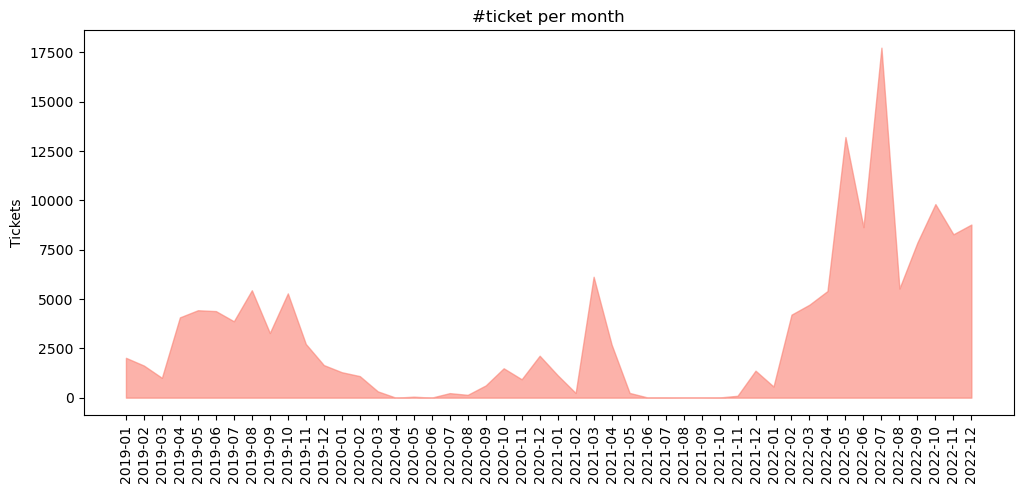

In [44]:
plt.figure (figsize =(12,5))
#Area graph for number of ticket by month
plt.fill_between (df_year_month['year_month'], df_year_month ['total_sale'], color = 'salmon', alpha = 0.6)
plt.title ('#ticket per month')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.show ()

**NOTE:**

- Some months have 0 ticket# but it still has a little line --> change 0 value into null

In [45]:
df_year_month['total_sale'].replace (0, np.nan, inplace = True)

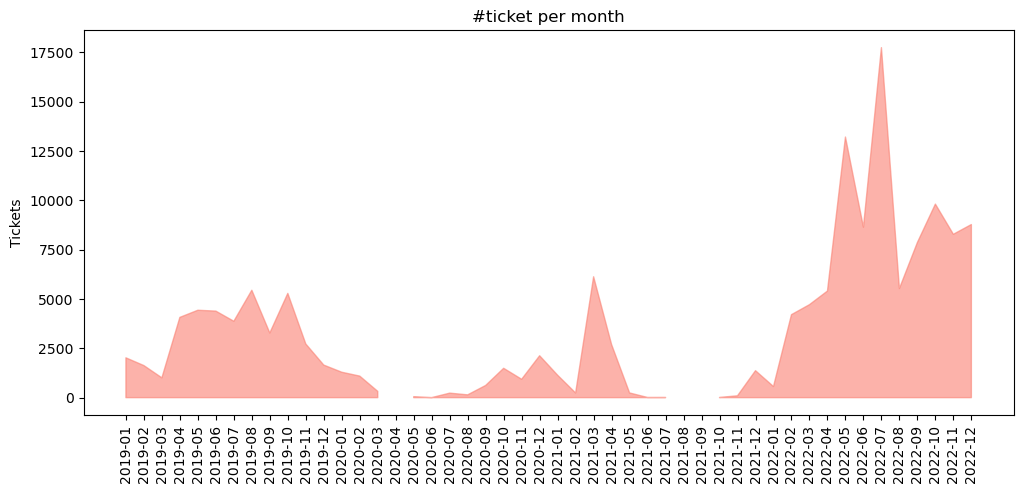

In [46]:
plt.figure (figsize =(12,5))
#Area graph for number of ticket by month
plt.fill_between (df_year_month['year_month'], df_year_month ['total_sale'], color = 'salmon', alpha = 0.6)
plt.title ('#ticket per month')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.show ()

In [47]:
#number of ticket by day
df_week_day = (df_join_all.groupby ('day_name')
          .agg (total_sale = ('ticket_id','count'))
          .reset_index())
df_week_day

,day_name,total_sale
0,Friday,26438
1,Monday,16702
2,Saturday,34450
3,Sunday,26960
4,Thursday,19101
5,Tuesday,14793
6,Wednesday,16281


Day_name not in a order --> pd.Categorical (df_col, categories = [list_in_order], ordered = True)

In [48]:
list_day = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
#put day_name in order
df_week_day ['day_order'] = pd.Categorical (df_week_day ['day_name'], categories = list_day, ordered = True)
df_week_day.sort_values ('day_order', ascending = True ,inplace=True)
df_week_day

,day_name,total_sale,day_order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


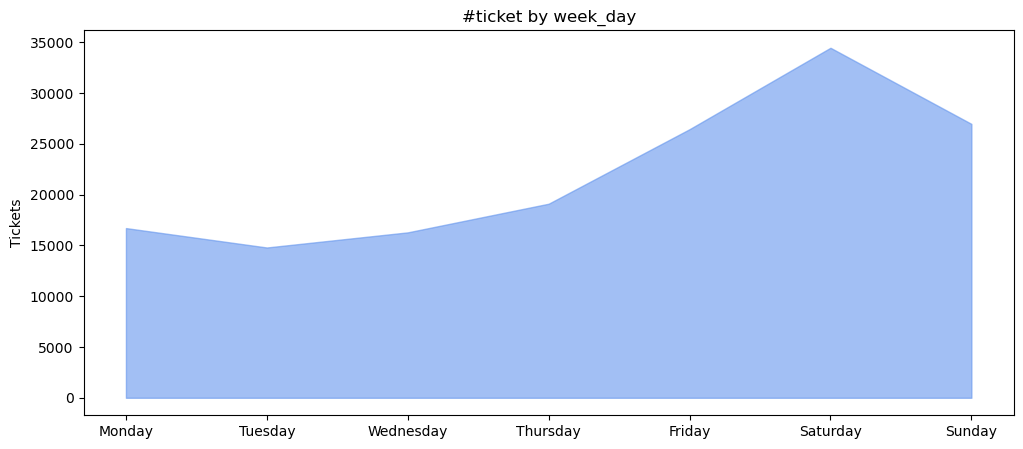

In [49]:
plt.figure (figsize =(12,5))
#Area graph for ticket by day
plt.fill_between (df_week_day['day_name'], df_week_day ['total_sale'], color = 'cornflowerblue', alpha = 0.6)
plt.title ('#ticket by week_day')
plt.ylabel ('Tickets')
plt.show ()

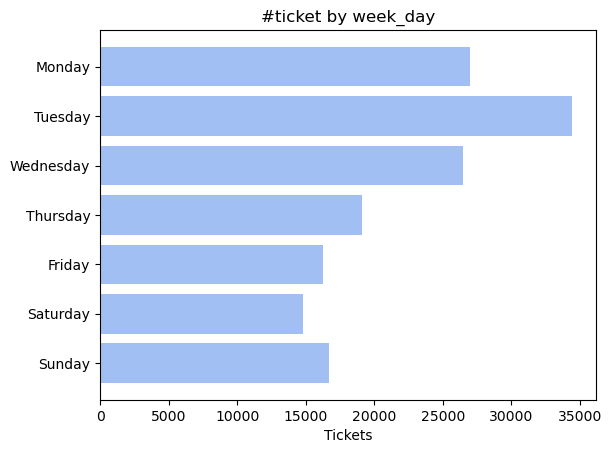

In [50]:
#plot horizon bar graph}
plt.barh (df_week_day['day_order'].sort_values(ascending = False), df_week_day ['total_sale'], color = 'cornflowerblue', alpha = 0.6)
plt.title ('#ticket by week_day')
plt.xlabel ('Tickets')
plt.show ()

In [51]:
df_hour = (df_join_all.groupby ('hour')
          .agg (total_sale = ('ticket_id','count'))
          .reset_index())
df_hour.head(2)

,hour,total_sale
0,0,2352
1,1,964


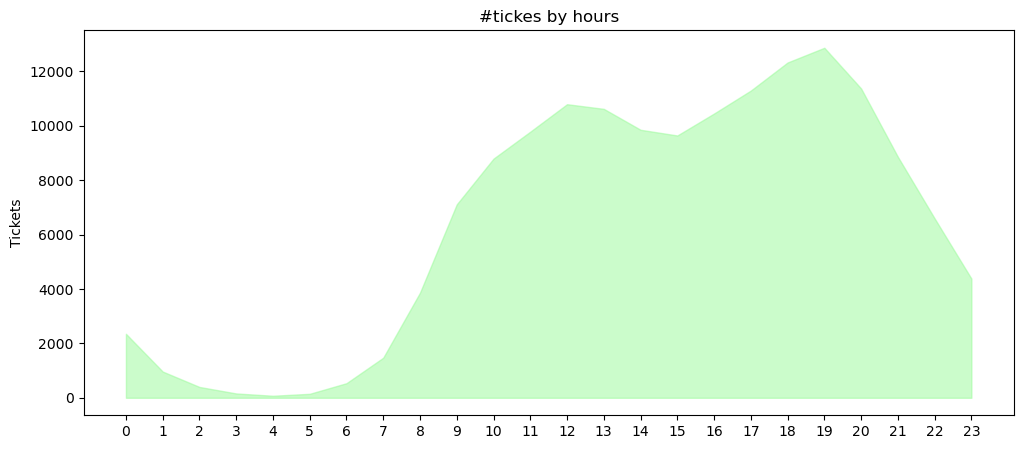

In [52]:
plt.figure (figsize =(12,5))
#fill_between graph of hour
plt.fill_between (df_hour['hour'],df_hour['total_sale'], color = 'palegreen', alpha = 0.5)
x_value = [i for i in range (24)]
plt.xticks (x_value)
plt.title ('#tickes by hours')
plt.ylabel ('Tickets')
plt.show ()

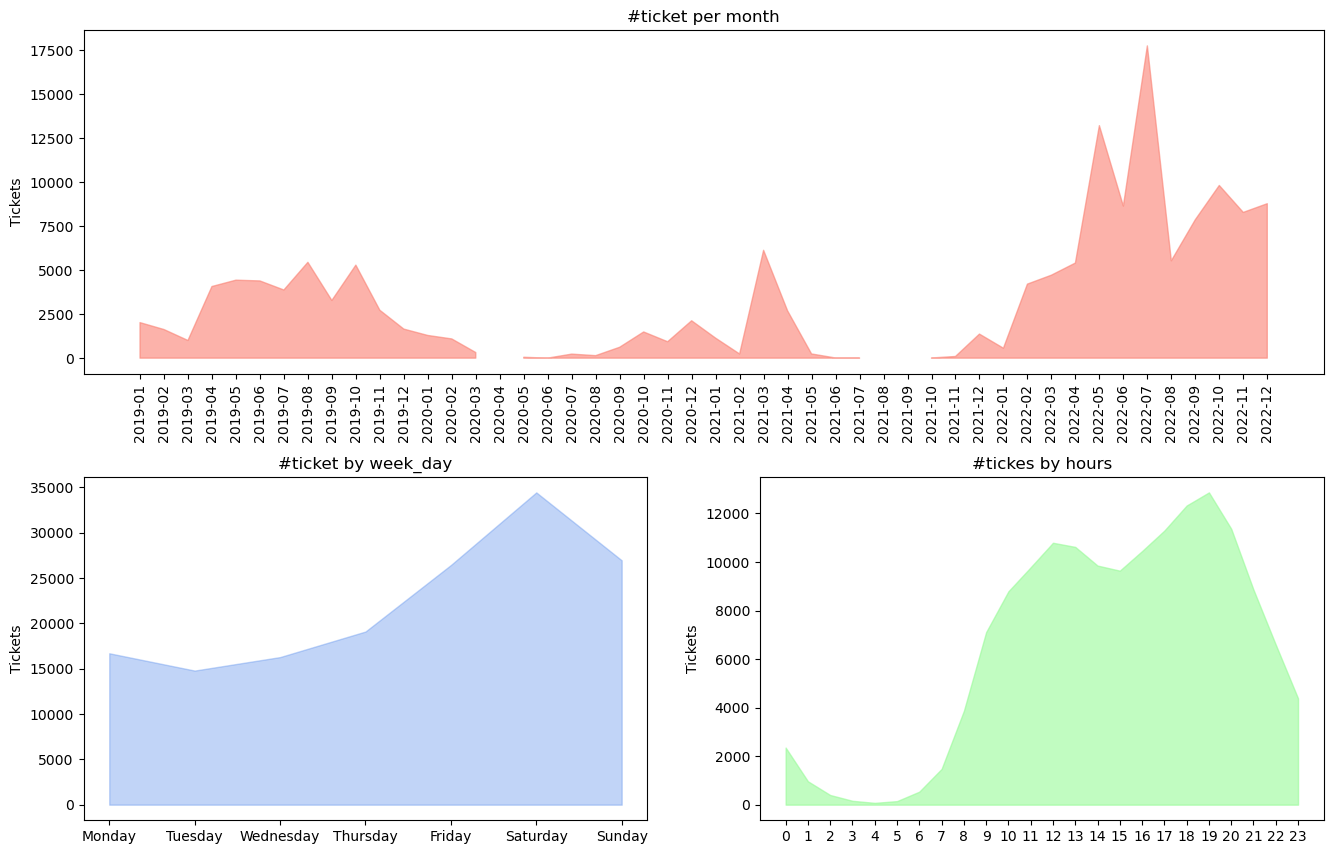

In [53]:
#plot all graph in one time
plt.figure(figsize = (16,10))
#plot the fill_between of year_month
ax1 = plt.subplot (2,1,1)
plt.fill_between (df_year_month['year_month'], df_year_month ['total_sale'], color = 'salmon', alpha = 0.6)
plt.title ('#ticket per month')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
#plot the fill_between of week_day
ax2 = plt.subplot (2,2,3)
plt.fill_between (df_week_day['day_name'], df_week_day ['total_sale'], color = 'cornflowerblue', alpha = 0.4)
plt.title ('#ticket by week_day')
plt.ylabel ('Tickets')
#plot the fill_between of hours
ax3 = plt.subplot (2,2,4)
plt.fill_between (df_hour['hour'],df_hour['total_sale'], color = 'palegreen', alpha = 0.6)
x_value = [i for i in range (24)]
plt.xticks (x_value)
plt.title ('#tickes by hours')
plt.ylabel ('Tickets')

plt.subplots_adjust (hspace = 0.3, top = 0.9)

plt.show ()

**NOTE:**
- The months with no ticket sold could be explained as the pademic led to lock-down.
- After lock-down, there existed a significant customers coming cinema due to lock-down revenge or block-busters.

- In a week, we witness a steady increament from Tuesday before reaching the peak at Saturday when people tend to go out for entertainment. --> Could do a discount on Tuesday to have more customers.

- According hours in a day, there were 2 periods recording a high-volumn customers which are 11am-12pm and 7-8pm.
It is easy to explain that people finish their work and be free at these time. 
--> Could colaborate and advertise with restaurents nearby to maximize the profit.

## 2.4 Platform check:

In [54]:
df_join_all['platform'].fillna ( 'unknown', inplace = True)
df_platform = df_join_all[df_join_all ['platform'] != 'unknown'].groupby('platform').agg (total_sales= ('ticket_id','count')).reset_index ()
df_platform

,platform,total_sales
0,mobile,138136
1,website,16511


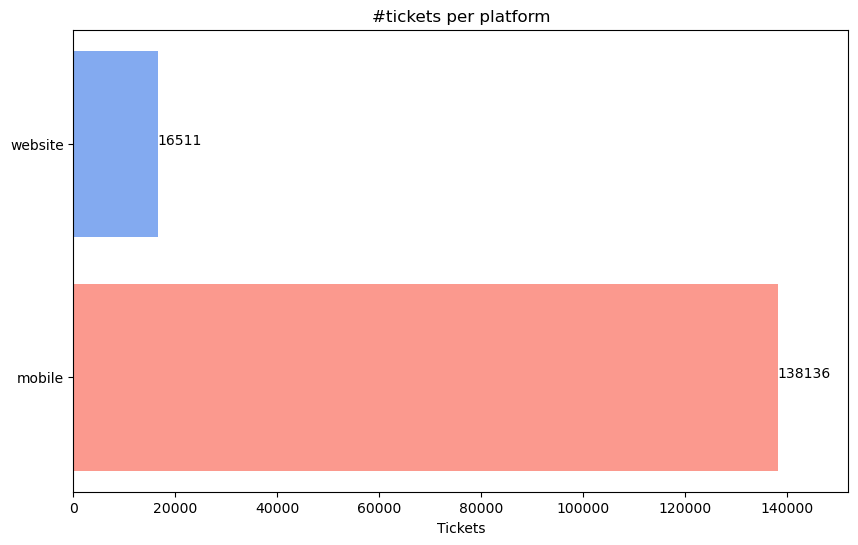

In [55]:
plt.figure (figsize = (10,6) )
#horizon bar graph of number ticket by platform
plt.barh (df_platform['platform'], df_platform['total_sales'], color = df_platform['platform'].replace({'mobile':'salmon','website':'cornflowerblue'}), alpha = 0.8)
plt.title ('#tickets per platform')
plt.xlabel ('Tickets')
plt.xlim (0, 152000)
for index, value in enumerate(df_platform['total_sales']):
    plt.text(value, index, str(value))

plt.show()


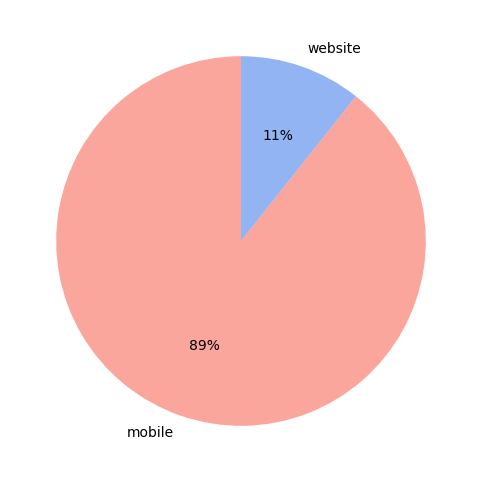

In [56]:
plt.figure (figsize = (7,6) )
#pie chart of platform
plt.pie (df_platform ['total_sales'], labels = df_platform ['platform'], colors = df_platform['platform'].replace({'mobile':'salmon','website':'cornflowerblue'}),wedgeprops = {'alpha' : 0.7}, startangle = 90, autopct = '%1.0f%%')
plt.show ()


In [57]:
#platform by time
df_join_all['platform'].fillna ( 'unknown', inplace = True)
df_platform_time = (df_join_all[df_join_all ['platform'] != 'unknown']
                    .groupby(['year_month','platform'])
                    .agg (total_sales= ('ticket_id','count')).reset_index ())
df_platform_time.head()

,year_month,platform,total_sales
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430


In [58]:
df_platform_pivot = (
    df_join_all [df_join_all ['platform'] != 'unknown']
    .pivot_table (index = 'year_month', columns = 'platform', values = 'ticket_id', aggfunc = 'count')
    .reset_index()
)
df_platform_pivot.head()

platform,year_month,mobile,website
0,2019-01,2019.0,NaN
1,2019-02,1626.0,NaN
2,2019-03,1004.0,NaN
3,2019-04,4069.0,NaN
4,2019-05,4430.0,NaN


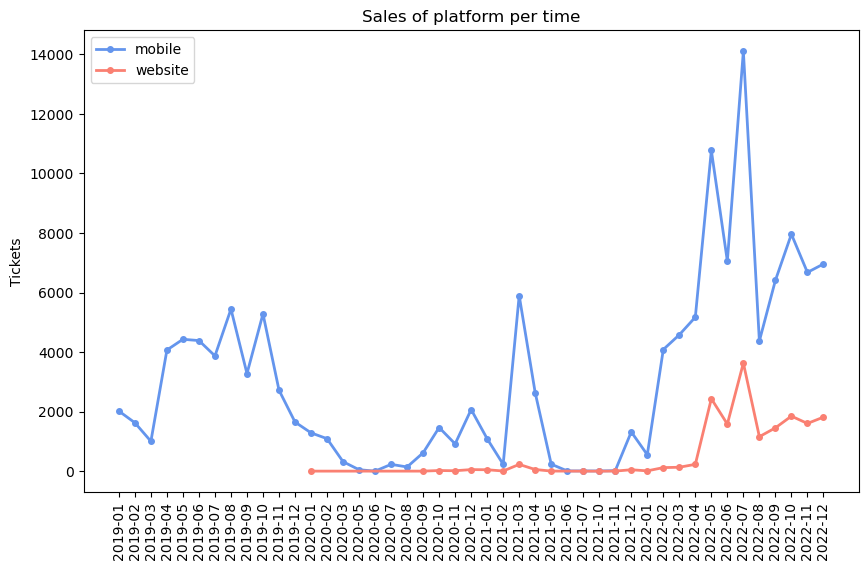

In [59]:
#plot by time-series data with groupby func
plt.figure (figsize = (10,6))
#plot line char of 2 each platform by time_series
df_mobile_line = df_platform_time [df_platform_time['platform'] == 'mobile']
plt.plot (df_mobile_line['year_month'], df_mobile_line['total_sales'],label = 'mobile' ,linewidth = 2 ,marker = 'o',markersize = 4, color = 'cornflowerblue')

df_web_line = df_platform_time [df_platform_time['platform'] == 'website']
plt.plot (df_web_line['year_month'], df_web_line['total_sales'], label = 'website' ,linewidth = 2 ,marker = 'o',markersize = 4, color = 'salmon')

plt.legend (loc = 'upper left')
plt.title ('Sales of platform per time')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.show ()

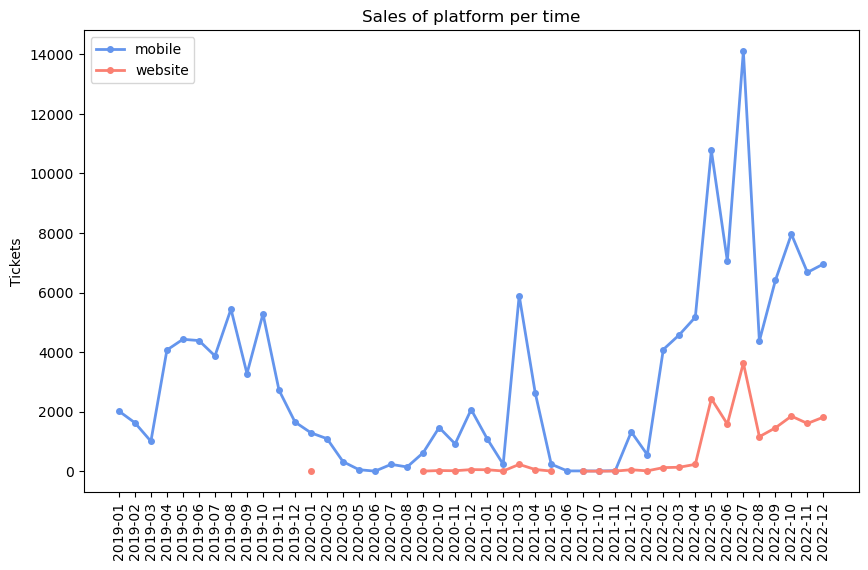

In [60]:
#plot by PIVOT table
plt.figure (figsize = (10,6))
#plot line char of 2 each platform by time_series
plt.plot (df_platform_pivot['year_month'], df_platform_pivot['mobile'],label = 'mobile' ,linewidth = 2 ,marker = 'o',markersize = 4, color = 'cornflowerblue')
plt.plot (df_platform_pivot['year_month'], df_platform_pivot['website'], label = 'website' ,linewidth = 2 ,marker = 'o',markersize = 4, color = 'salmon')

plt.legend (loc = 'upper left')
plt.title ('Sales of platform per time')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.show ()

**NOTE:**
- Tickets sold via mobile dominated in all the time. --> explore which type of mobile was.

## 2.5 OS_version check:

In [61]:
df_join_all['model'].fillna('unknown', inplace = True)
#label the os_version based on the model
df_join_all ['os_version'] = df_join_all['model'].apply (lambda x: 'IOS' if ('iPhone' in x or 'iPad' in x)
                                                                else 'browser' if 'browser' in x
                                                                else 'unknown' if ('unknown' in x or 'devicemodel'in x)
                                                                else 'Android & others')

In [62]:
#check if we fail to catch any case
df_join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  description     154725 non-null  object        
 13  error_group     21046 non-null   object        
 14  model           154725 non-null  obj

In [63]:
df_join_all.head ()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount,12363,33,7,Friday,17,2022-07,IOS
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Order successful,NaN,browser,website,Male,1991-06-09,direct discount,11529,31,7,Friday,20,2022-07,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Order successful,NaN,unknown,mobile,Male,1989-05-18,NaN,12281,33,7,Saturday,11,2022-07,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1997-08-31,direct discount,9254,25,7,Monday,22,2022-07,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1988-09-20,direct discount,12521,34,7,Sunday,18,2022-07,unknown


In [64]:
df_version = df_join_all.groupby ('os_version').agg (total_sales = ('ticket_id', 'count')).reset_index ().sort_values ('total_sales')
df_version

,os_version,total_sales
2,browser,13377
0,Android & others,20936
1,IOS,51558
3,unknown,68854


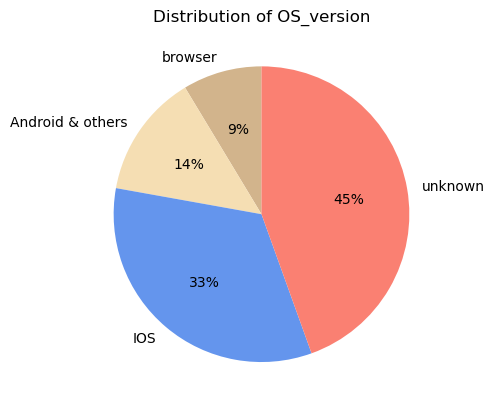

In [65]:
#plot pie chart of os_version
plt.pie (df_version['total_sales'], labels = df_version['os_version'], startangle = 90, autopct = '%1.0f%%' ,colors = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'tan'}))
plt.title('Distribution of OS_version')

plt.show()

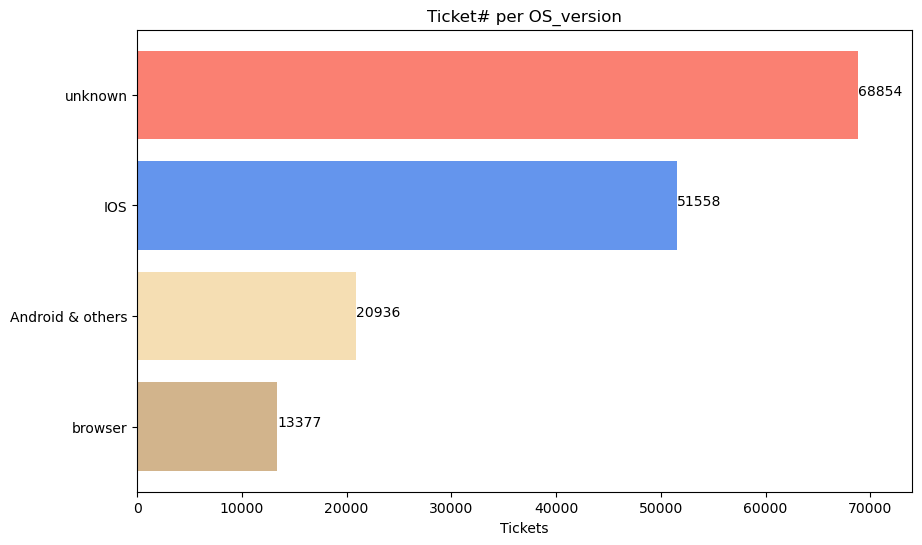

In [66]:
plt.figure (figsize = (10,6))
#plot barh of os_version
plt.barh (df_version['os_version'], df_version['total_sales'],color = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'tan'}))
for index, value in enumerate(df_version['total_sales']):
    plt.text(value, index, str(value))
plt.xlim (0,74000)
plt.title ('Ticket# per OS_version')
plt.xlabel ('Tickets')

plt.show()

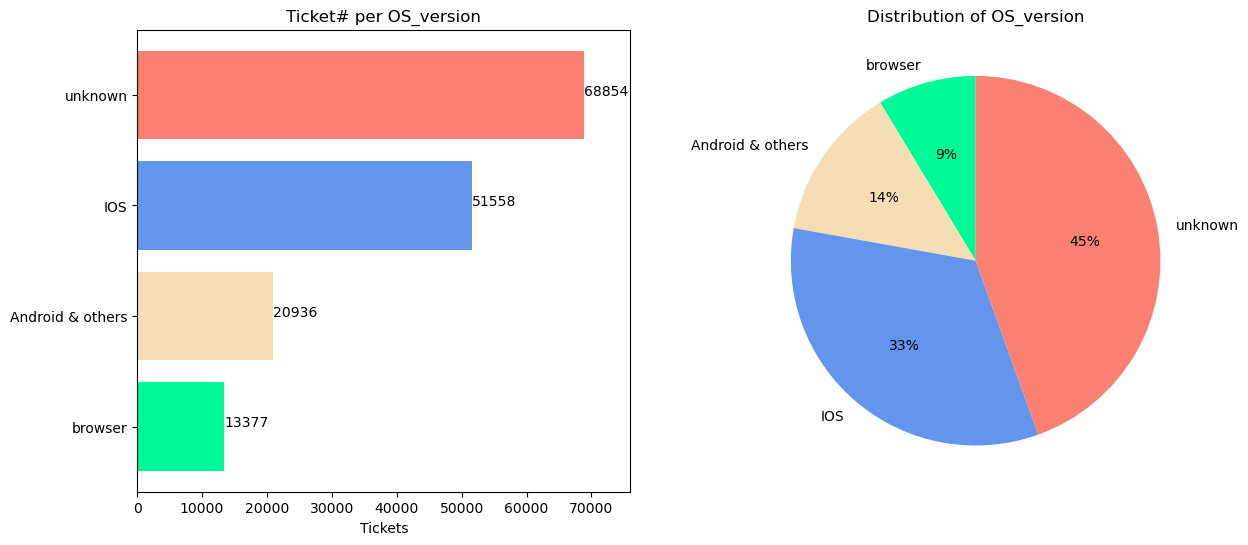

In [67]:
plt.figure (figsize = (14,6))
#plot barh
ax1 = plt.subplot (1,2,1)
plt.barh (df_version['os_version'], df_version['total_sales'],color = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'mediumspringgreen'}))
for index, value in enumerate(df_version['total_sales']):
    plt.text(value, index, str(value))
plt.xlim (0,76000)
plt.title ('Ticket# per OS_version')
plt.xlabel ('Tickets')

#plot pie
ax2 = plt.subplot (1,2,2)
plt.pie (df_version['total_sales'], labels = df_version['os_version'], startangle = 90, autopct = '%1.0f%%' ,colors = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'mediumspringgreen'}))
plt.title('Distribution of OS_version')

plt.show()

In [68]:
#Time-series data for version
df_version_time = (df_join_all.groupby (['year_month','os_version'])
              .agg (total_sales = ('ticket_id', 'count'))
              .reset_index ())

df_version_time

,year_month,os_version,total_sales
0,2019-01,Android & others,703
1,2019-01,IOS,1243
2,2019-01,unknown,73
3,2019-02,Android & others,537
4,2019-02,IOS,1079
...,...,...,...
136,2022-11,unknown,5100
137,2022-12,Android & others,85
138,2022-12,IOS,2127
139,2022-12,browser,1202


In [69]:
#Pivot table for os_version by year_month
df_version_pivot = df_join_all.pivot_table (index = 'year_month', columns = df_join_all['os_version'], values = 'ticket_id',aggfunc = 'count' ).reset_index ()
df_version_pivot.head()

os_version,year_month,Android & others,IOS,browser,unknown
0,2019-01,703.0,1243.0,NaN,73.0
1,2019-02,537.0,1079.0,NaN,10.0
2,2019-03,366.0,636.0,NaN,2.0
3,2019-04,1505.0,2555.0,NaN,9.0
4,2019-05,1578.0,2849.0,NaN,3.0


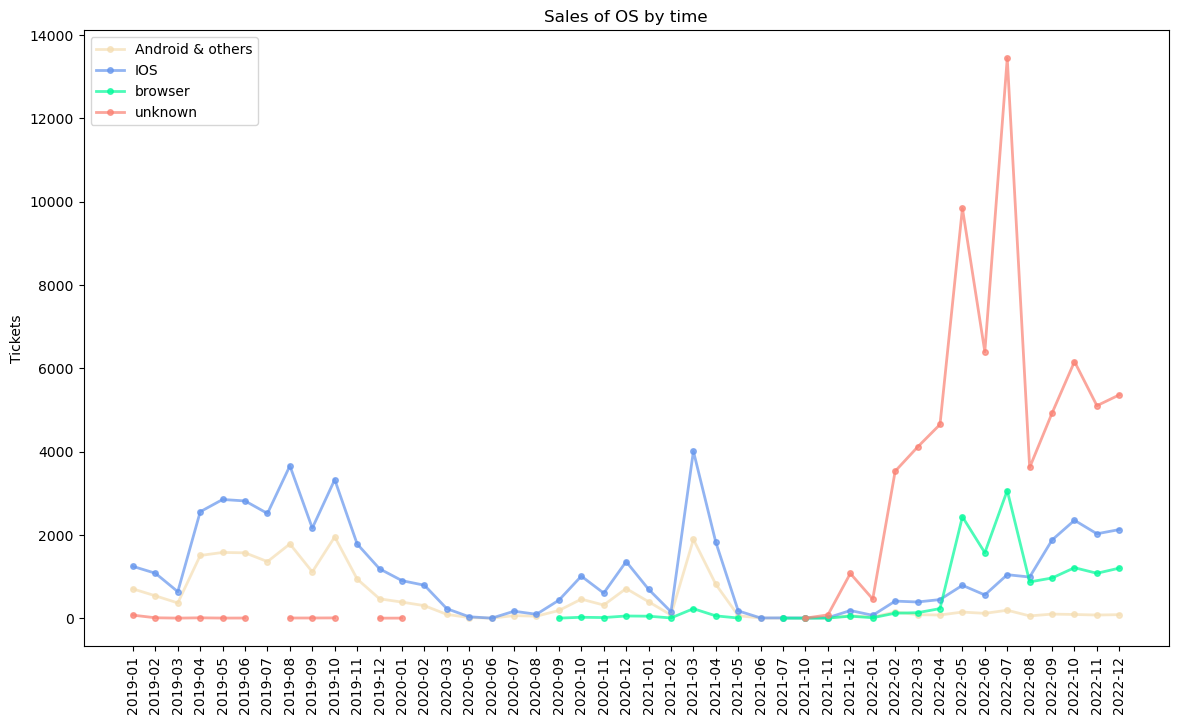

In [70]:
#plot by line chart of each os
plt.figure (figsize = (14,8))
#'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'tan'
plt.plot (df_version_pivot ['year_month'], df_version_pivot['Android & others'], label = 'Android & others' , color = 'wheat', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['IOS'], label = 'IOS' ,color = 'cornflowerblue', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['browser'], label = 'browser' ,color = 'mediumspringgreen', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['unknown'], label ='unknown' , color = 'salmon', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)

plt.title ('Sales of OS by time')
plt.legend ()
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')

plt.show ()


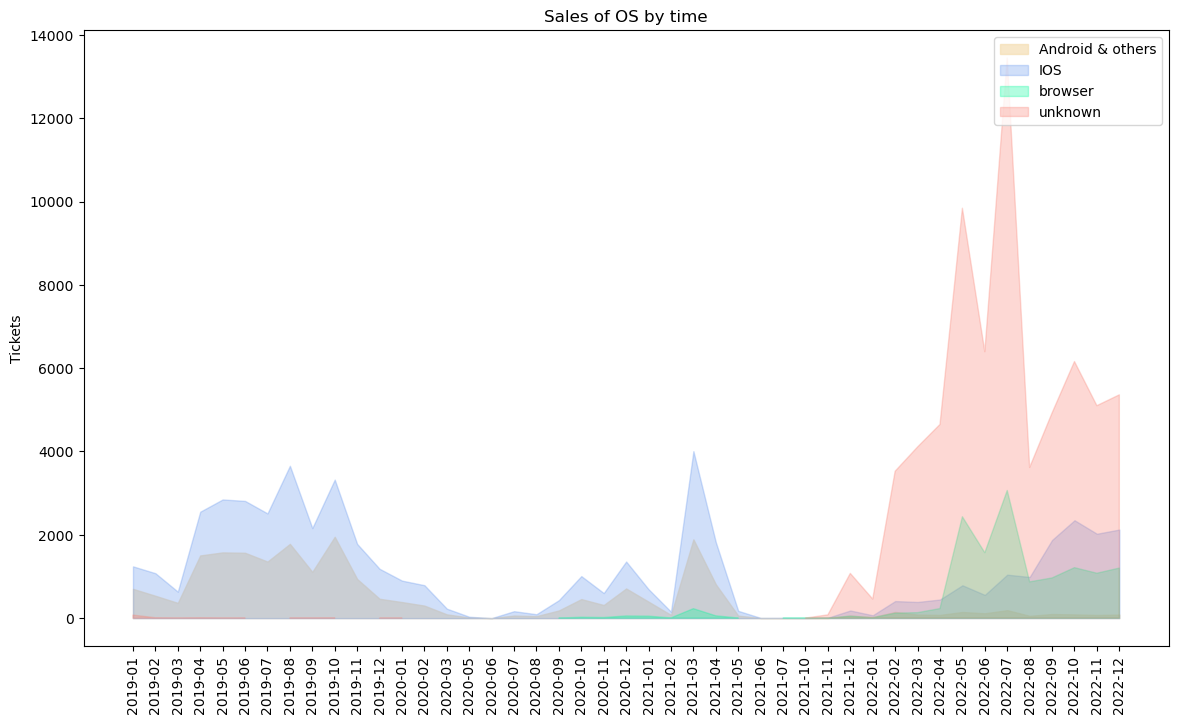

In [71]:
#plot by fill_between chart of each os
plt.figure (figsize = (14,8))

#'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'tan'
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['Android & others'], label = 'Android & others' , color = 'wheat',  alpha = 0.7)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['IOS'], label = 'IOS' ,color = 'cornflowerblue',   alpha = 0.3)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['browser'], label = 'browser' ,color = 'mediumspringgreen', alpha = 0.3)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['unknown'], label ='unknown' , color = 'salmon', alpha = 0.3)

plt.title ('Sales of OS by time')
plt.legend ()
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')

plt.show ()


In [72]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount,12363,33,7,Friday,17,2022-07,IOS
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Order successful,NaN,browser,website,Male,1991-06-09,direct discount,11529,31,7,Friday,20,2022-07,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Order successful,NaN,unknown,mobile,Male,1989-05-18,NaN,12281,33,7,Saturday,11,2022-07,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1997-08-31,direct discount,9254,25,7,Monday,22,2022-07,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1988-09-20,direct discount,12521,34,7,Sunday,18,2022-07,unknown


In [73]:
#Making pivot table of OS version by time
df_os_time_pivot = (df_join_all
                    .pivot_table (index = 'year_month', columns = 'os_version', values = 'ticket_id', aggfunc = 'count')
                    .reset_index ())
df_os_time_pivot.fillna (0, inplace = True)
df_os_time_pivot.head ()

os_version,year_month,Android & others,IOS,browser,unknown
0,2019-01,703.0,1243.0,0.0,73.0
1,2019-02,537.0,1079.0,0.0,10.0
2,2019-03,366.0,636.0,0.0,2.0
3,2019-04,1505.0,2555.0,0.0,9.0
4,2019-05,1578.0,2849.0,0.0,3.0


In [74]:
df_os_time_pivot_pct = df_os_time_pivot.copy ()

#add total column for pivot table
df_os_time_pivot_pct ['total'] = df_os_time_pivot_pct.iloc [:, 1:].sum (axis = 1)

#add pct column for each element
for i in df_os_time_pivot_pct.columns [1:5]:
  df_os_time_pivot_pct[i + ' pct'] = df_os_time_pivot_pct[i] / df_os_time_pivot_pct['total']


df_os_time_pivot_pct

os_version,year_month,Android & others,IOS,browser,unknown,total,Android & others pct,IOS pct,browser pct,unknown pct
0,2019-01,703.0,1243.0,0.0,73.0,2019.0,0.348192,0.615651,0.000000,0.036157
1,2019-02,537.0,1079.0,0.0,10.0,1626.0,0.330258,0.663592,0.000000,0.006150
2,2019-03,366.0,636.0,0.0,2.0,1004.0,0.364542,0.633466,0.000000,0.001992
3,2019-04,1505.0,2555.0,0.0,9.0,4069.0,0.369870,0.627918,0.000000,0.002212
4,2019-05,1578.0,2849.0,0.0,3.0,4430.0,0.356208,0.643115,0.000000,0.000677
5,2019-06,1569.0,2814.0,0.0,4.0,4387.0,0.357648,0.641441,0.000000,0.000912
6,2019-07,1358.0,2514.0,0.0,0.0,3872.0,0.350723,0.649277,0.000000,0.000000
7,2019-08,1782.0,3657.0,0.0,5.0,5444.0,0.327333,0.671749,0.000000,0.000918
8,2019-09,1111.0,2162.0,0.0,5.0,3278.0,0.338926,0.659549,0.000000,0.001525
9,2019-10,1952.0,3325.0,0.0,7.0,5284.0,0.369417,0.629258,0.000000,0.001325


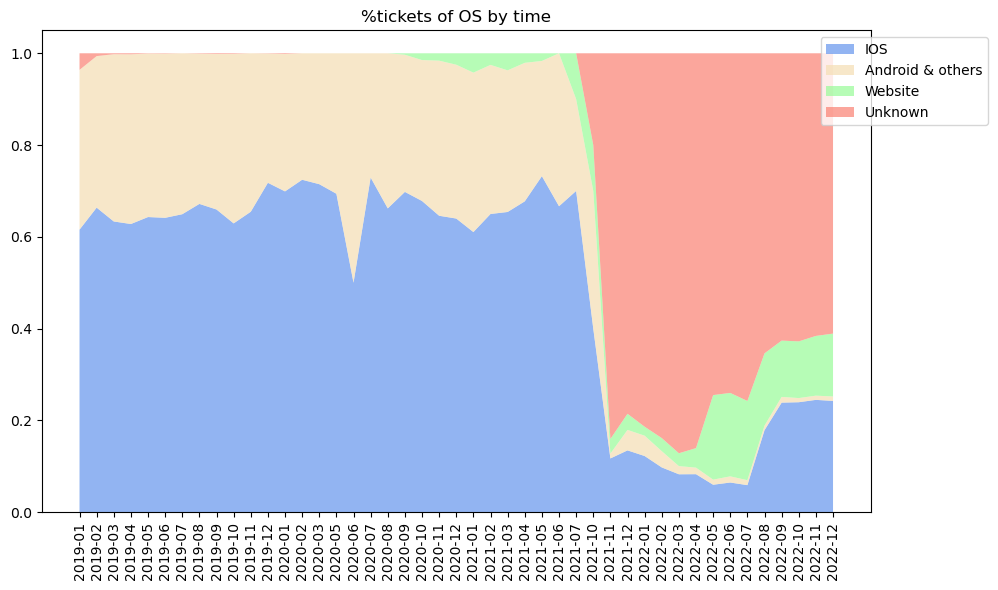

In [75]:
#plot stacked area chart
plt.figure (figsize = (10,6))
#{'Unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','Website':'palegreen'}
plt.stackplot (df_os_time_pivot_pct ['year_month'],
               df_os_time_pivot_pct ['IOS pct'], df_os_time_pivot_pct ['Android & others pct'], df_os_time_pivot_pct ['browser pct'], df_os_time_pivot_pct ['unknown pct'],
               labels = ['IOS', 'Android & others', 'Website', 'Unknown'],
               colors = ['cornflowerblue', 'wheat', 'palegreen', 'salmon'],
               alpha =0.7
               )
plt.xticks (rotation = 90)
plt.legend (bbox_to_anchor=(1.15, 1))
plt.title ('%tickets of OS by time')
plt.tight_layout()

plt.show ()

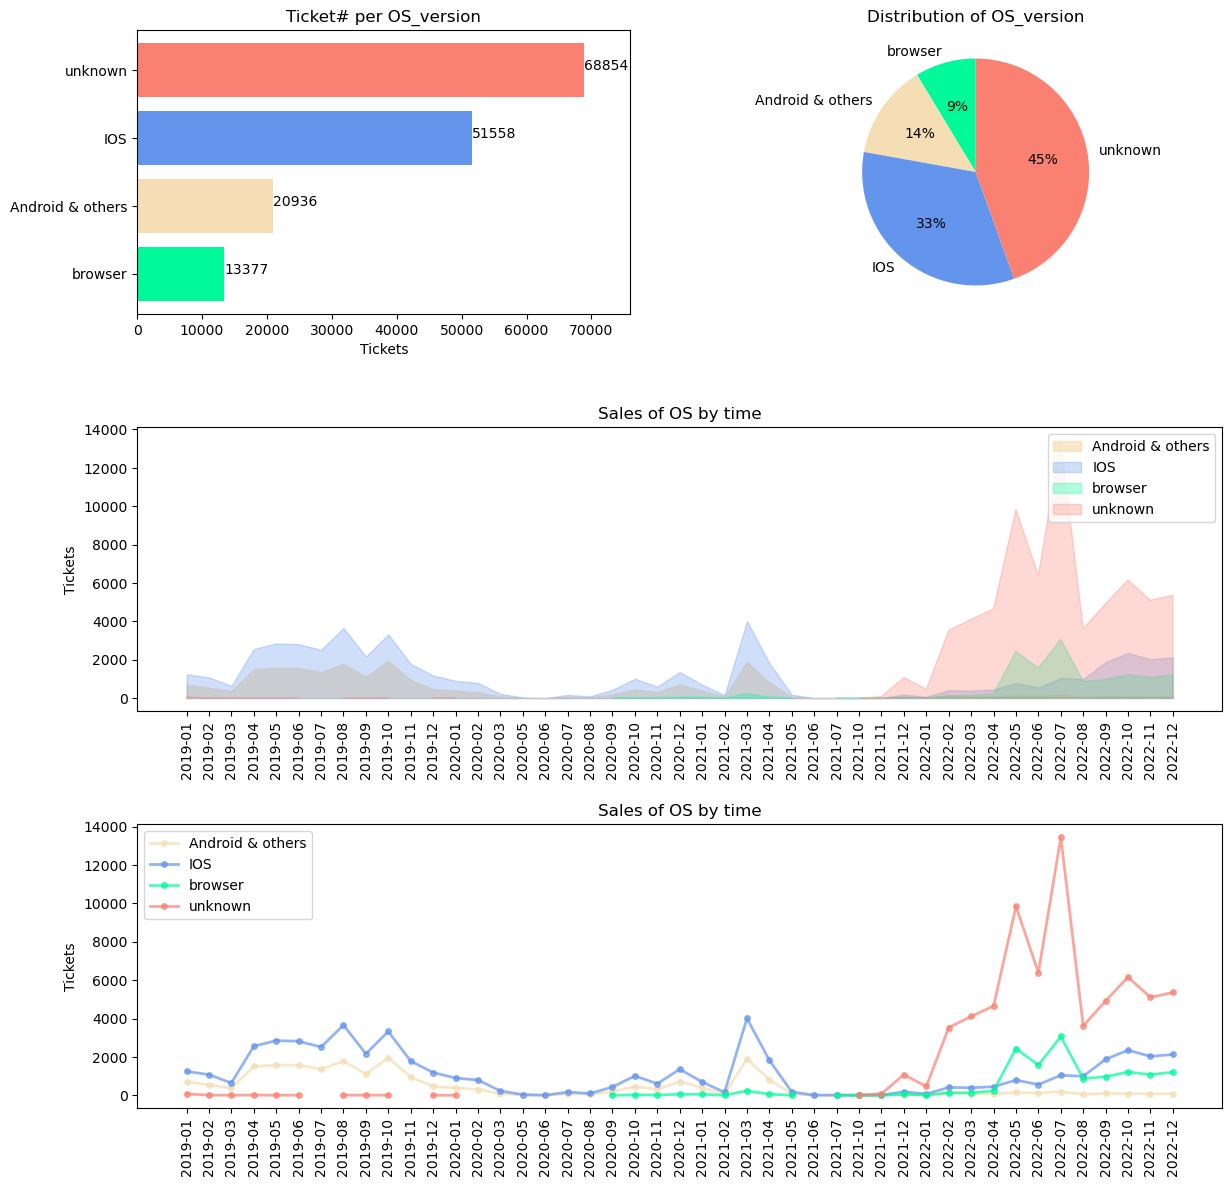

In [76]:
plt.figure (figsize = (14,14))
#plot barh
ax1 = plt.subplot (3,2,1)
plt.barh (df_version['os_version'], df_version['total_sales'],color = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'mediumspringgreen'}))
for index, value in enumerate(df_version['total_sales']):
    plt.text(value, index, str(value))
plt.xlim (0,76000)
plt.title ('Ticket# per OS_version')
plt.xlabel ('Tickets')

#plot pie
ax2 = plt.subplot (3,2,2)
plt.pie (df_version['total_sales'], labels = df_version['os_version'], startangle = 90, autopct = '%1.0f%%' ,colors = df_version['os_version'].replace ({'unknown':'salmon','IOS':'cornflowerblue','Android & others':'wheat','browser':'mediumspringgreen'}))
plt.title('Distribution of OS_version')

#plot fill_between char
ax3 = plt.subplot (3,1,2)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['Android & others'], label = 'Android & others' , color = 'wheat',  alpha = 0.7)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['IOS'], label = 'IOS' ,color = 'cornflowerblue',   alpha = 0.3)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['browser'], label = 'browser' ,color = 'mediumspringgreen', alpha = 0.3)
plt.fill_between (df_version_pivot ['year_month'], df_version_pivot['unknown'], label ='unknown' , color = 'salmon', alpha = 0.3)

plt.title ('Sales of OS by time')
plt.legend ()
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')

#plot line char
ax4 = plt.subplot (3,1,3)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['Android & others'], label = 'Android & others' , color = 'wheat', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['IOS'], label = 'IOS' ,color = 'cornflowerblue', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['browser'], label = 'browser' ,color = 'mediumspringgreen', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)
plt.plot (df_version_pivot ['year_month'], df_version_pivot['unknown'], label ='unknown' , color = 'salmon', marker = 'o', markersize =4, linewidth = 2, alpha = 0.7)

plt.title ('Sales of OS by time')
plt.legend ()
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')

plt.subplots_adjust (hspace = 0.4)

plt.show ()

**NOTE:**
- Besides "unknown" group, IOS is the most common OS, the reason may be the better UI, the convenient payment method (Apple Pay) or the promotion ? (ask the software developer and marketing staff to verify)

- There existed a large amount of unknow OS, especially from the year of 2022, it seemed that we have a unexpected error in labeling the model which led to a lost of numerous important insights about OS. --> contact to technical staff to fix or update the system as soon as possible. 

## 2.6 Payment method check:


In [77]:
#Count total sales of each paying method (success trans only)
df_paying_method = (df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
                  .groupby('paying_method')
                  .agg (total_sales = ('ticket_id','count'))
                  .sort_values ('total_sales')
                  .reset_index()
                  )
df_paying_method

,paying_method,total_sales
0,debit card,11395
1,credit card,15408
2,bank account,42057
3,money in app,64817


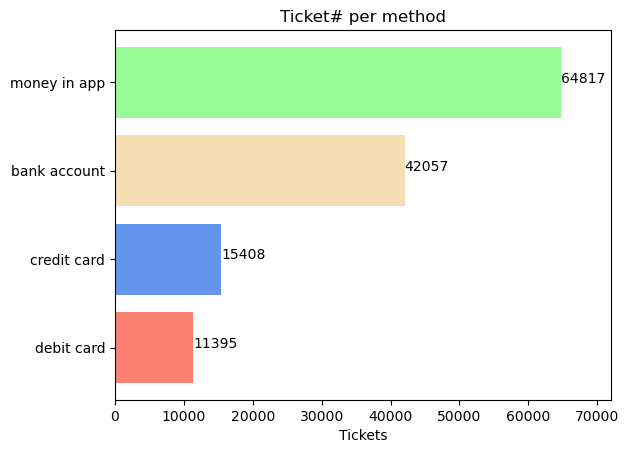

In [78]:
#plot barh chart
plt.barh (df_paying_method['paying_method'], df_paying_method['total_sales'], color = df_paying_method['paying_method'].replace({'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}))
plt.title ('Ticket# per method')
plt.xlabel ('Tickets')
for index,value in enumerate(df_paying_method['total_sales']):
    plt.text(value,index,str(value))
plt.xlim (0,72000)

plt.show ()

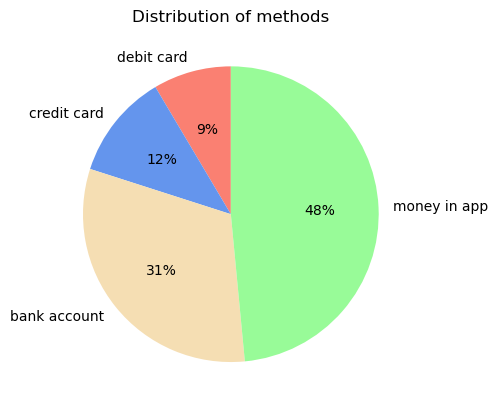

In [79]:
#plot pie char
plt.pie (df_paying_method['total_sales'], labels = df_paying_method['paying_method'], autopct = '%1.0f%%', startangle = 90 ,colors = df_paying_method['paying_method'].replace({'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}))
plt.title ('Distribution of methods')

plt.show ()

In [80]:
#pivot table for total sale of each method by time
df_paying_method_time = (df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
                  .groupby(['year_month','paying_method'])
                  .agg (total_sales = ('ticket_id','count'))
                  .reset_index()
                  )
df_paying_method_time.head()

,year_month,paying_method,total_sales
0,2019-01,bank account,487
1,2019-01,credit card,336
2,2019-01,debit card,93
3,2019-01,money in app,443
4,2019-02,bank account,484


In [81]:
#Only take success transaction
df_paying_method_time_pivot = (df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
                               .pivot_table (index = 'year_month', columns = 'paying_method', values = 'ticket_id', aggfunc = 'count')
                               .reset_index ()
                               )
#fill na value by 0
df_paying_method_time_pivot.fillna (0, inplace = True)

df_paying_method_time_pivot.head ()

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


In [82]:
df_paying_method_time_pivot_pct = df_paying_method_time_pivot.copy ()

#add total column for pivot table
df_paying_method_time_pivot_pct ['total'] = df_paying_method_time_pivot_pct.iloc [:, 1:].sum (axis = 1)

#add pct column for each element
for i in df_paying_method_time_pivot_pct.columns [1:5]:
  df_paying_method_time_pivot_pct[i + ' pct'] = df_paying_method_time_pivot_pct[i] / df_paying_method_time_pivot_pct['total']


df_paying_method_time_pivot_pct.head ()

paying_method,year_month,bank account,credit card,debit card,money in app,total,bank account pct,credit card pct,debit card pct,money in app pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826


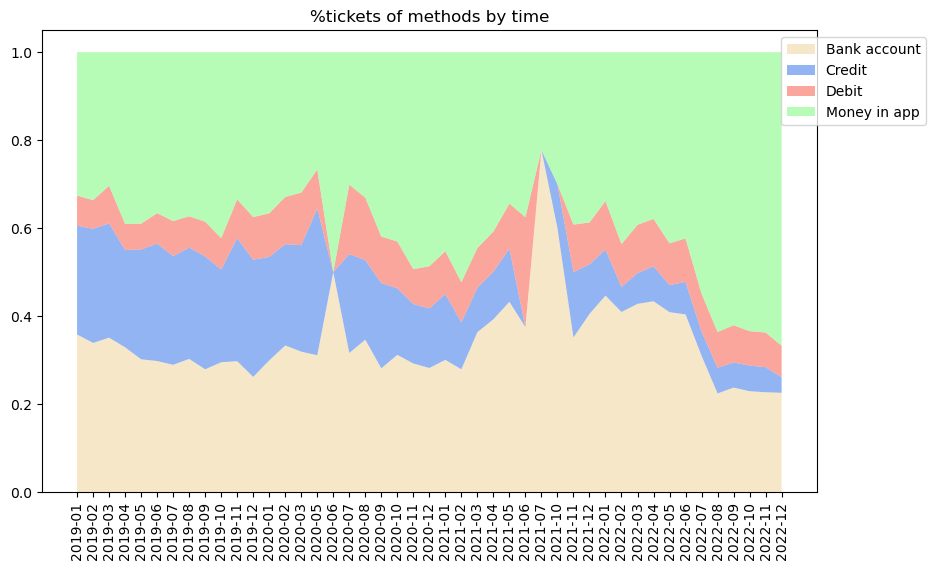

In [83]:
#plot stacked area chart
plt.figure (figsize = (10,6))

#{'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}
plt.stackplot (df_paying_method_time_pivot_pct ['year_month'],
               df_paying_method_time_pivot_pct ['bank account pct'], df_paying_method_time_pivot_pct ['credit card pct'], df_paying_method_time_pivot_pct ['debit card pct'], df_paying_method_time_pivot_pct ['money in app pct'],
               labels = ['Bank account', 'Credit', 'Debit', 'Money in app'],
               colors = ['wheat', 'cornflowerblue', 'salmon', 'palegreen'],
               alpha =0.7
               )
plt.xticks (rotation = 90)
plt.legend (bbox_to_anchor=(1.15, 1))
plt.title ('%tickets of methods by time')

plt.show ()

In [84]:
df_paying_method_time_pivot.head ()

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


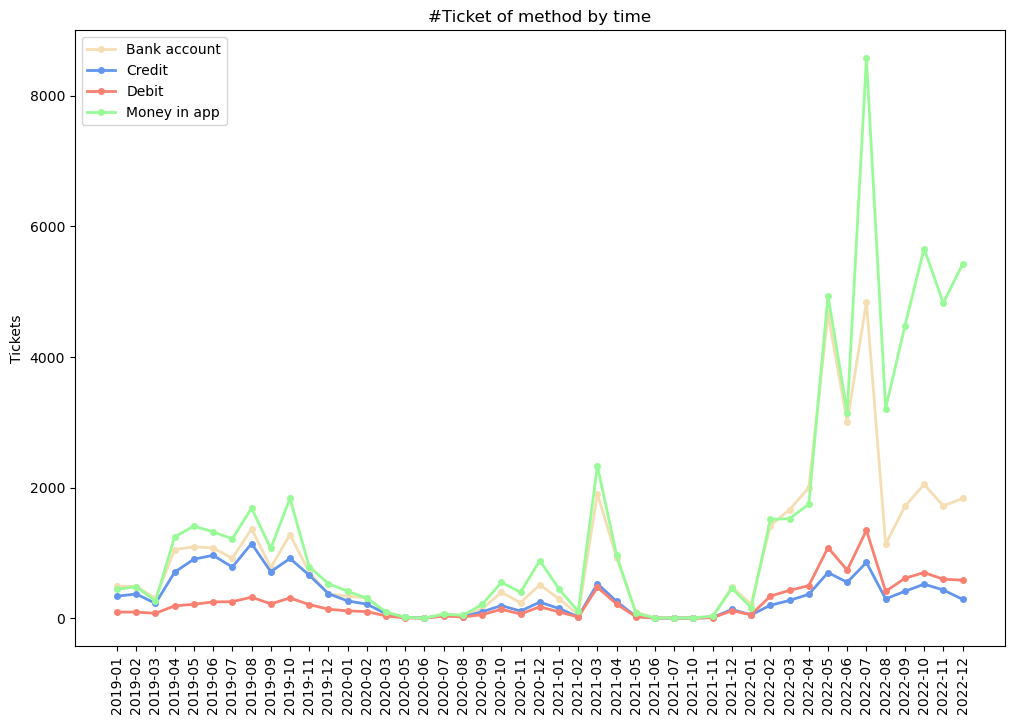

In [85]:
#plot line char of each method
plt.figure (figsize = (12,8))
#{'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['bank account'], label = 'Bank account', color = 'wheat', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['credit card'], label = 'Credit', color = 'cornflowerblue', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['debit card'], label = 'Debit', color = 'salmon', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['money in app'], label = 'Money in app', color = 'palegreen', marker = 'o', linewidth = 2, markersize = 4)

plt.title ('#Ticket of method by time')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.legend ()

plt.show()

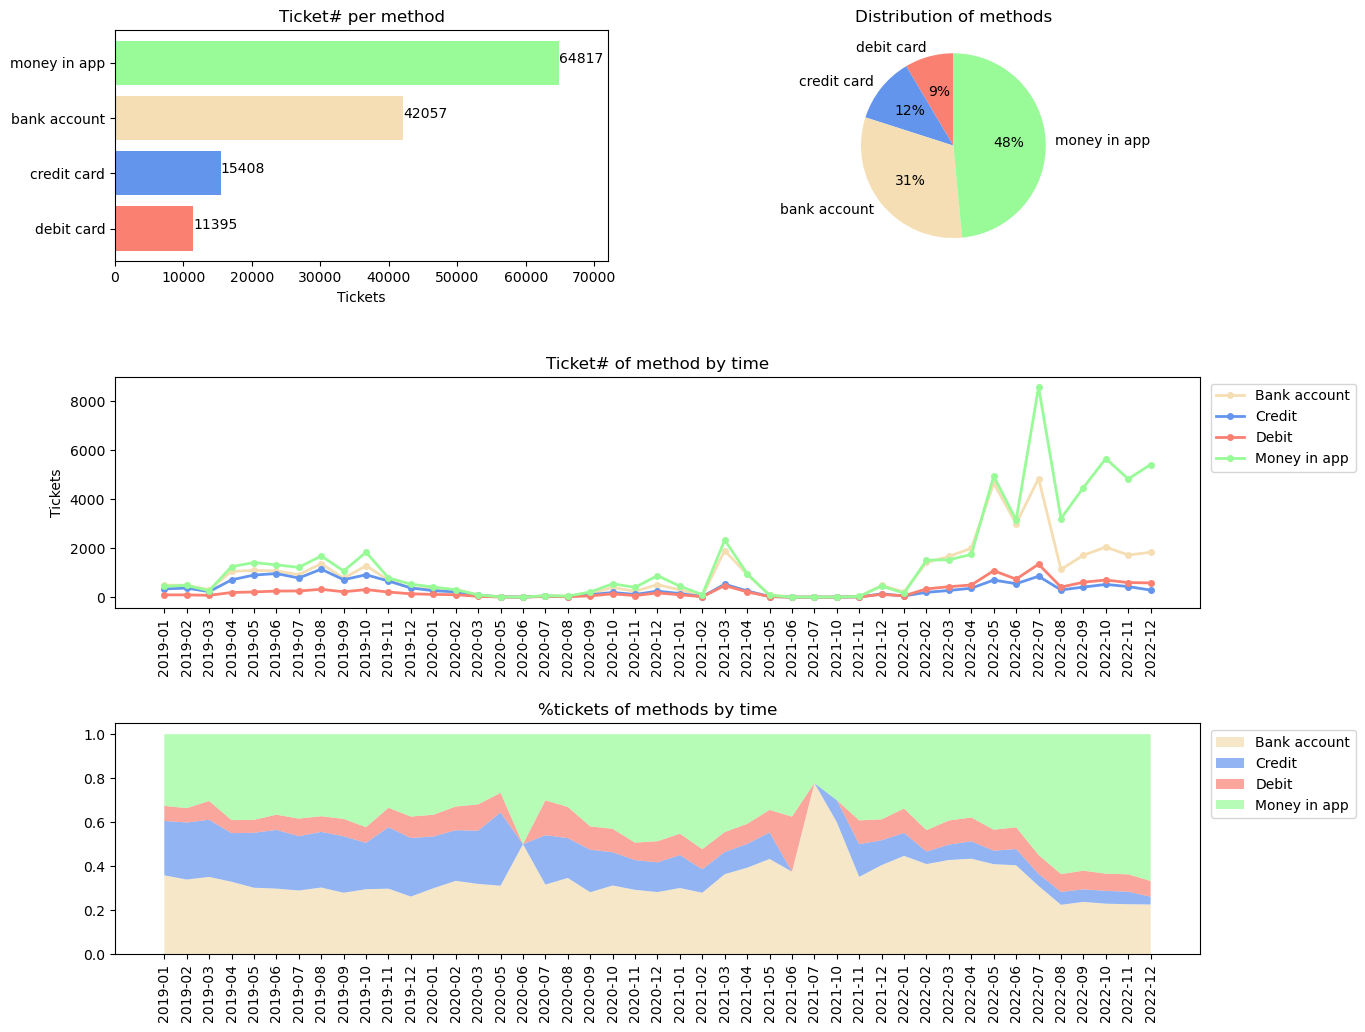

In [86]:
#Payment method chart
plt.figure (figsize = (14,12))

#barh chart
ax1 = plt.subplot (3,2,1)
plt.barh (df_paying_method['paying_method'], df_paying_method['total_sales'], color = df_paying_method['paying_method'].replace({'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}))
plt.title ('Ticket# per method')
plt.xlabel ('Tickets')
for index,value in enumerate(df_paying_method['total_sales']):
    plt.text(value,index,str(value))
plt.xlim (0,72000)

#pie chart
ax2 = plt.subplot (3,2,2)
plt.pie (df_paying_method['total_sales'], labels = df_paying_method['paying_method'], autopct = '%1.0f%%', startangle = 90 ,colors = df_paying_method['paying_method'].replace({'debit card':'salmon','credit card':'cornflowerblue','bank account':'wheat','money in app':'palegreen'}))
plt.title ('Distribution of methods')

#line chart
ax3 = plt.subplot (3,1,2)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['bank account'], label = 'Bank account', color = 'wheat', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['credit card'], label = 'Credit', color = 'cornflowerblue', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['debit card'], label = 'Debit', color = 'salmon', marker = 'o', linewidth = 2, markersize = 4)
plt.plot (df_paying_method_time_pivot['year_month'], df_paying_method_time_pivot['money in app'], label = 'Money in app', color = 'palegreen', marker = 'o', linewidth = 2, markersize = 4)

plt.title ('Ticket# of method by time')
plt.xticks (rotation = 90)
plt.ylabel ('Tickets')
plt.legend (bbox_to_anchor=(1.15, 1))

#stack area chart
ax4 =  plt.subplot (3,1,3)
plt.stackplot (df_paying_method_time_pivot_pct ['year_month'],
               df_paying_method_time_pivot_pct ['bank account pct'], df_paying_method_time_pivot_pct ['credit card pct'], df_paying_method_time_pivot_pct ['debit card pct'], df_paying_method_time_pivot_pct ['money in app pct'],
               labels = ['Bank account', 'Credit', 'Debit', 'Money in app'],
               colors = ['wheat', 'cornflowerblue', 'salmon', 'palegreen'],
               alpha =0.7
               )
plt.xticks (rotation = 90)
plt.legend (bbox_to_anchor=(1.15, 1))
plt.title ('%tickets of methods by time')

plt.subplots_adjust (hspace = 0.5)
plt.show ()

**NOTE:**
- Most successful transactions were done via "money in app", then "Bank account". 

--> While the bank is unadjustable, we could run marketing campaign and colaborate with other apps to attract customers.

## **2.7 Promotion check:**


In [87]:
df_join_all.head (2)
df_join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  description     154725 non-null  object        
 13  error_group     21046 non-null   object        
 14  model           154725 non-null  obj

In [88]:
promotion_list = list(df_join_all[df_join_all['campaign_type'].notna()]['campaign_type'].unique ())
promotion_list

['direct discount', 'voucher', 'reward point']

In [89]:
df_join_all ['type'] = df_join_all ['campaign_type'].apply (lambda x: 'promotion' if x in promotion_list else 'non_promotion')

In [90]:
#take sucessful order and paying_method != other
df_promotion =  (df_join_all [(df_join_all['status_id']==1) & (df_join_all['paying_method'] != 'other')]
    .groupby ('type').agg (total_sales = ('ticket_id','count'))).reset_index ()
df_promotion

,type,total_sales
0,non_promotion,55155
1,promotion,78522


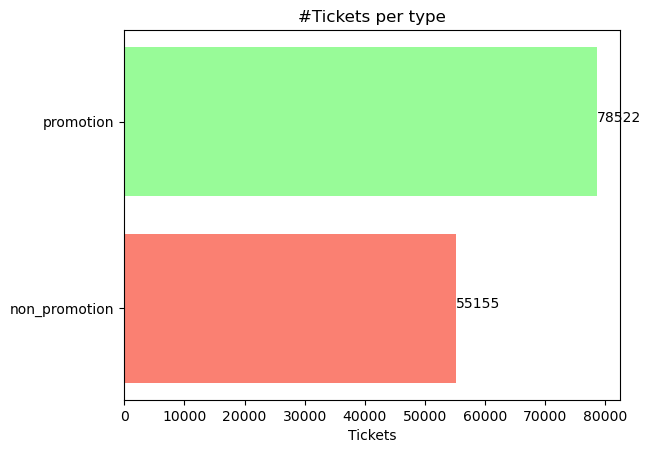

In [91]:
#plot barh
plt.barh (df_promotion['type'], df_promotion['total_sales'], color = df_promotion['type'].replace ({'non_promotion': 'salmon', 'promotion': 'palegreen'}))
plt.title ('#Tickets per type')
plt.xlabel ('Tickets')
for index,value in enumerate(df_promotion['total_sales']):
    plt.text(value,index,str(value))

plt.show ()


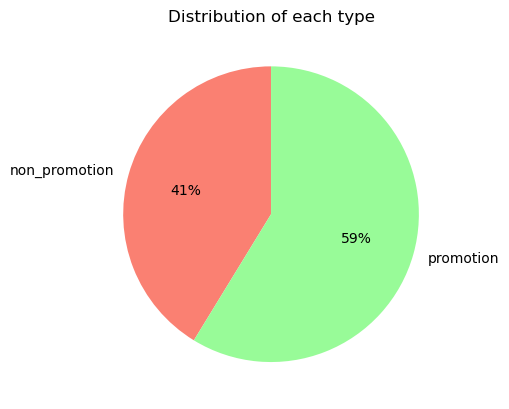

In [92]:
#plot pie chart
plt.pie (df_promotion['total_sales'], labels = df_promotion['type'], autopct = '%1.0f%%', startangle = 90 ,colors = df_promotion['type'].replace ({'non_promotion': 'salmon', 'promotion': 'palegreen'}))
plt.title ('Distribution of each type')

plt.show()

In [93]:
#time-series promotion table
df_promotion_time =  (df_join_all [(df_join_all['status_id']==1) & (df_join_all['paying_method'] != 'other')]
    .groupby (['year_month','type']).agg (total_sales = ('ticket_id','count'))).reset_index ()
df_promotion_time.head ()

,year_month,type,total_sales
0,2019-01,non_promotion,517
1,2019-01,promotion,842
2,2019-02,non_promotion,1335
3,2019-02,promotion,92
4,2019-03,non_promotion,835


In [94]:
#pivot table promotion
df_promotion_time_pivot = (
    df_join_all [(df_join_all['status_id']==1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table (index = 'year_month', columns = 'type', aggfunc = 'count', values ='ticket_id')
    .reset_index ()
)
df_promotion_time_pivot.head ()

type,year_month,non_promotion,promotion
0,2019-01,517.0,842.0
1,2019-02,1335.0,92.0
2,2019-03,835.0,31.0
3,2019-04,1699.0,1491.0
4,2019-05,1564.0,2053.0


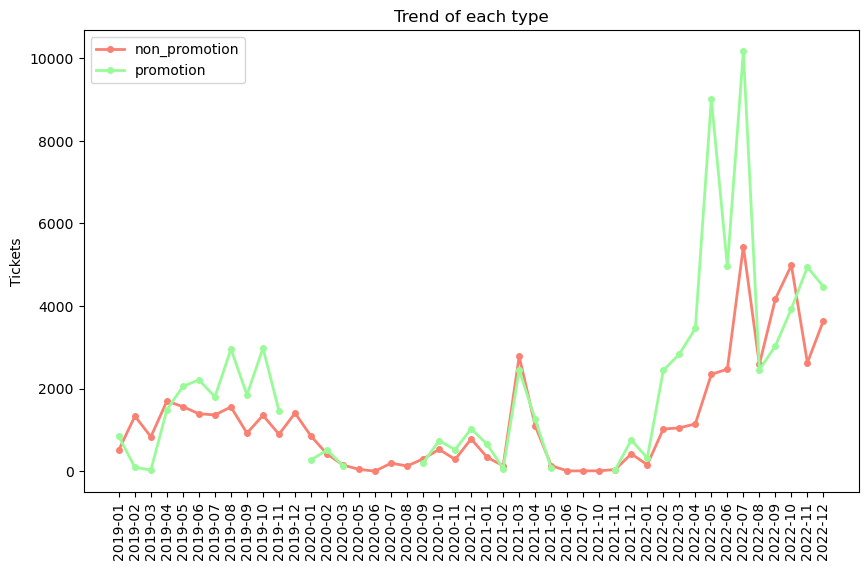

In [95]:
plt.figure (figsize = (10,6))
#plot line chart of each type
plt.plot (df_promotion_time_pivot['year_month'],df_promotion_time_pivot ['non_promotion'],label = 'non_promotion' , color = 'salmon', marker = 'o', markersize = 4, linewidth = 2 )
plt.plot (df_promotion_time_pivot['year_month'],df_promotion_time_pivot ['promotion'],label = 'promotion' ,color = 'palegreen', marker = 'o', markersize = 4, linewidth = 2 )

plt.title ('Trend of each type')
plt.ylabel ('Tickets')
plt.xticks (rotation = 90)
plt.legend ()
plt.show ()

In [96]:

df_promotion_time_pivot_pct = df_promotion_time_pivot.copy ().fillna (0)
#total sales
df_promotion_time_pivot_pct ['total'] = df_promotion_time_pivot.iloc [:,1:].sum (axis = 1)

#create pct column for each promontion type
for i in df_promotion_time_pivot_pct.columns[1:3]:
  df_promotion_time_pivot_pct[i+'_pct'] = df_promotion_time_pivot_pct[i]/ df_promotion_time_pivot_pct['total']
  
df_promotion_time_pivot_pct.head ()

type,year_month,non_promotion,promotion,total,non_promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398
4,2019-05,1564.0,2053.0,3617.0,0.432403,0.567597


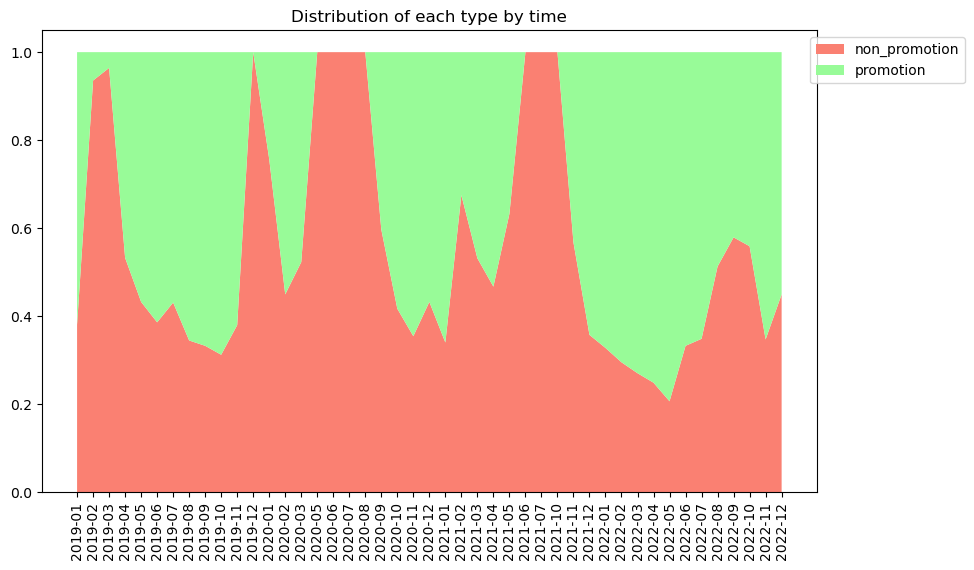

In [97]:
plt.figure (figsize = (10,6))
#plot stack area chart
plt.stackplot (df_promotion_time_pivot_pct ['year_month'], df_promotion_time_pivot_pct ['non_promotion_pct'], df_promotion_time_pivot_pct ['promotion_pct']
              , labels = ['non_promotion', 'promotion']
              , colors = ['salmon','palegreen'])
plt.title ('Distribution of each type by time')
plt.xticks (rotation  = 90)
plt.legend (bbox_to_anchor = (1.2,1))

plt.show ()

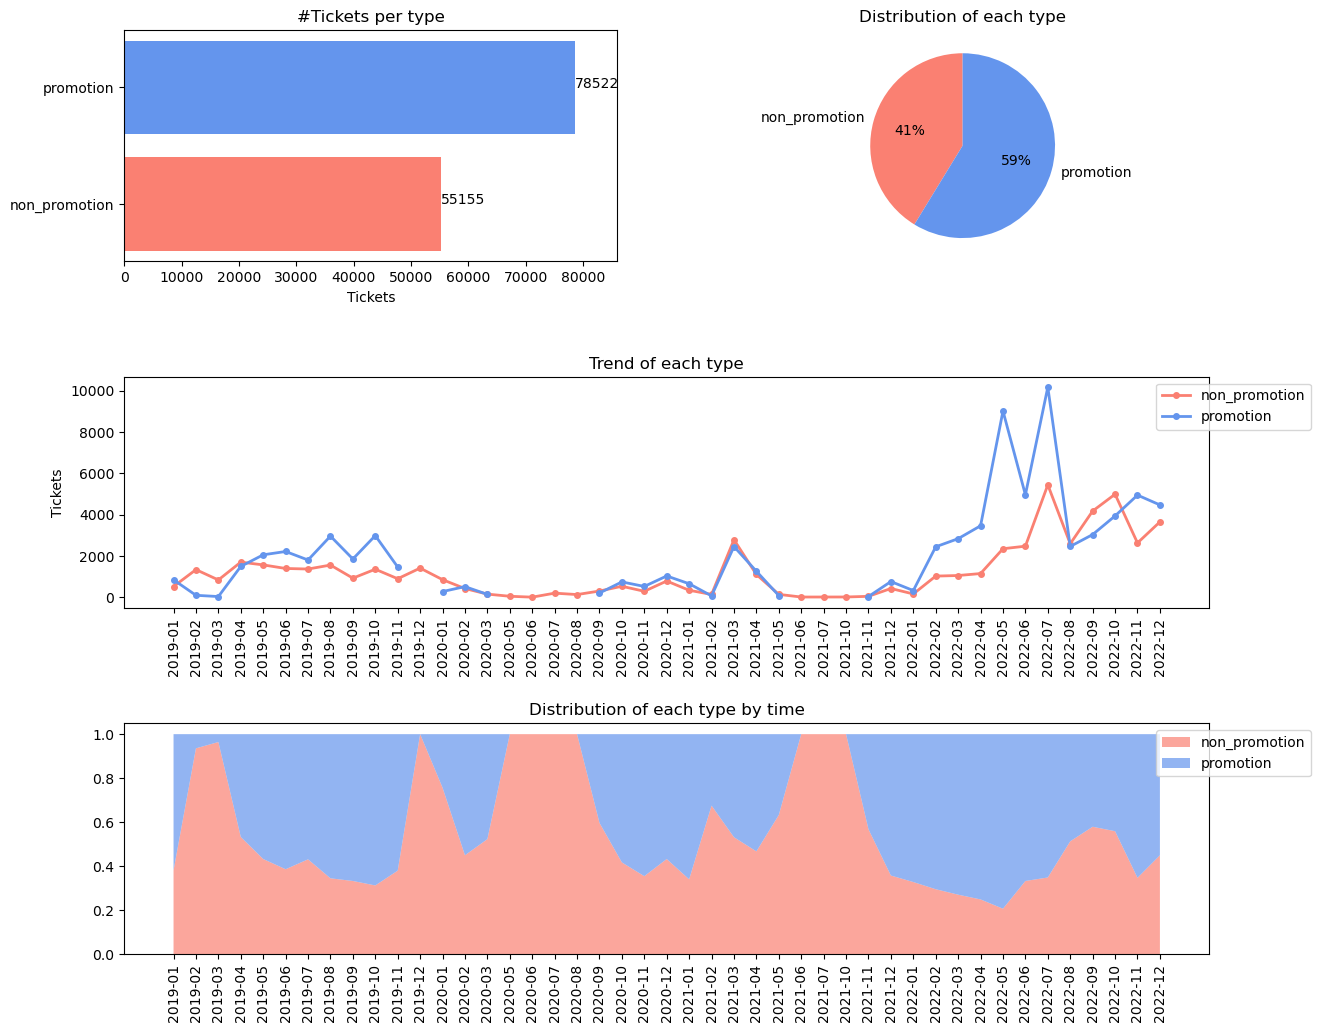

In [98]:
#Promotion chart
plt.figure (figsize = (14,12))
#barh chart
ax1 = plt.subplot (3,2,1)
plt.barh (df_promotion['type'], df_promotion['total_sales'], color = df_promotion['type'].replace ({'non_promotion': 'salmon', 'promotion': 'cornflowerblue'}))
plt.title ('#Tickets per type')
plt.xlabel ('Tickets')
for index,value in enumerate(df_promotion['total_sales']):
    plt.text(value,index,str(value))
plt.xlim (0,86000)
#pie chart
ax2 = plt.subplot (3,2,2)
plt.pie (df_promotion['total_sales'], labels = df_promotion['type'], autopct = '%1.0f%%', startangle = 90 ,colors = df_promotion['type'].replace ({'non_promotion': 'salmon', 'promotion': 'cornflowerblue'}))
plt.title ('Distribution of each type')

#line chart
ax3 = plt.subplot (3,1,2)
plt.plot (df_promotion_time_pivot['year_month'],df_promotion_time_pivot ['non_promotion'],label = 'non_promotion' , color = 'salmon', marker = 'o', markersize = 4, linewidth = 2 )
plt.plot (df_promotion_time_pivot['year_month'],df_promotion_time_pivot ['promotion'],label = 'promotion' ,color = 'cornflowerblue', marker = 'o', markersize = 4, linewidth = 2 )

plt.title ('Trend of each type')
plt.ylabel ('Tickets')
plt.xticks (rotation = 90)
plt.legend (bbox_to_anchor = (1.1,1))

#stack area chart
ax4 =  plt.subplot (3,1,3)
plt.stackplot (df_promotion_time_pivot_pct ['year_month'], df_promotion_time_pivot_pct ['non_promotion_pct'], df_promotion_time_pivot_pct ['promotion_pct']
              , labels = ['non_promotion', 'promotion']
              , colors = ['salmon','cornflowerblue']
              , alpha = 0.7)
plt.title ('Distribution of each type by time')
plt.xticks (rotation  = 90)
plt.legend (bbox_to_anchor = (1.1,1))

plt.subplots_adjust (hspace = 0.5)
plt.show ()

**NOTE:**
- There were some months having no promotion due to the Covid-19.

- A lot of marking campaigns restarted after the lock-down led to the rise of promotion at the start of 2022 before reaching the top in May and July. --> Should check the efficiency of these marketing campaign (Retention?).

## **2.8 Movie check:**

In [99]:
#Check movies sales and reevenue (by descending order)
df_film_sum = (
    df_join_all [(df_join_all['status_id']==1)]
    .groupby ('movie_name')
    .agg (total_ticket = ('ticket_id','count'),
          total_cus = ('customer_id', 'nunique'),
          revenue = ('final_price', 'sum'))
    .sort_values ('total_ticket', ascending = False)
    .reset_index ()
)
df_film_sum.head (30)

,movie_name,total_ticket,total_cus,revenue
0,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
1,Minions: The Rise Of Gru,7224,7014,56530.93
2,Avatar: The Way Of Water,5870,5612,59830.95
3,Thor: Love And Thunder,5589,5478,43372.90
4,Peninsula,5499,5365,41208.44
5,Black Panther 2: Wakanda Forever,3847,3790,26860.28
6,Black Adam,3229,3186,23159.34
7,Avengers: Endgame,3219,3135,26690.48
8,Dad I'm Sorry,3023,2817,25863.28
9,Love Destiny,2411,2376,18345.61


In [100]:
list_film = list(df_film_sum [df_film_sum['total_ticket'] > 1000]['movie_name'].unique ())
list_film

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [101]:
#Pivot table of every films by time
df_film_time_pivot = (
    df_join_all [(df_join_all['status_id']==1) & (df_join_all['movie_name'].isin (list_film))]
    .pivot_table (index = 'year_month', columns = 'movie_name', aggfunc = 'count', values = 'ticket_id')
    .reset_index()
)
df_film_time_pivot.head (30)

movie_name,year_month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1405.0,NaN,NaN,1008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


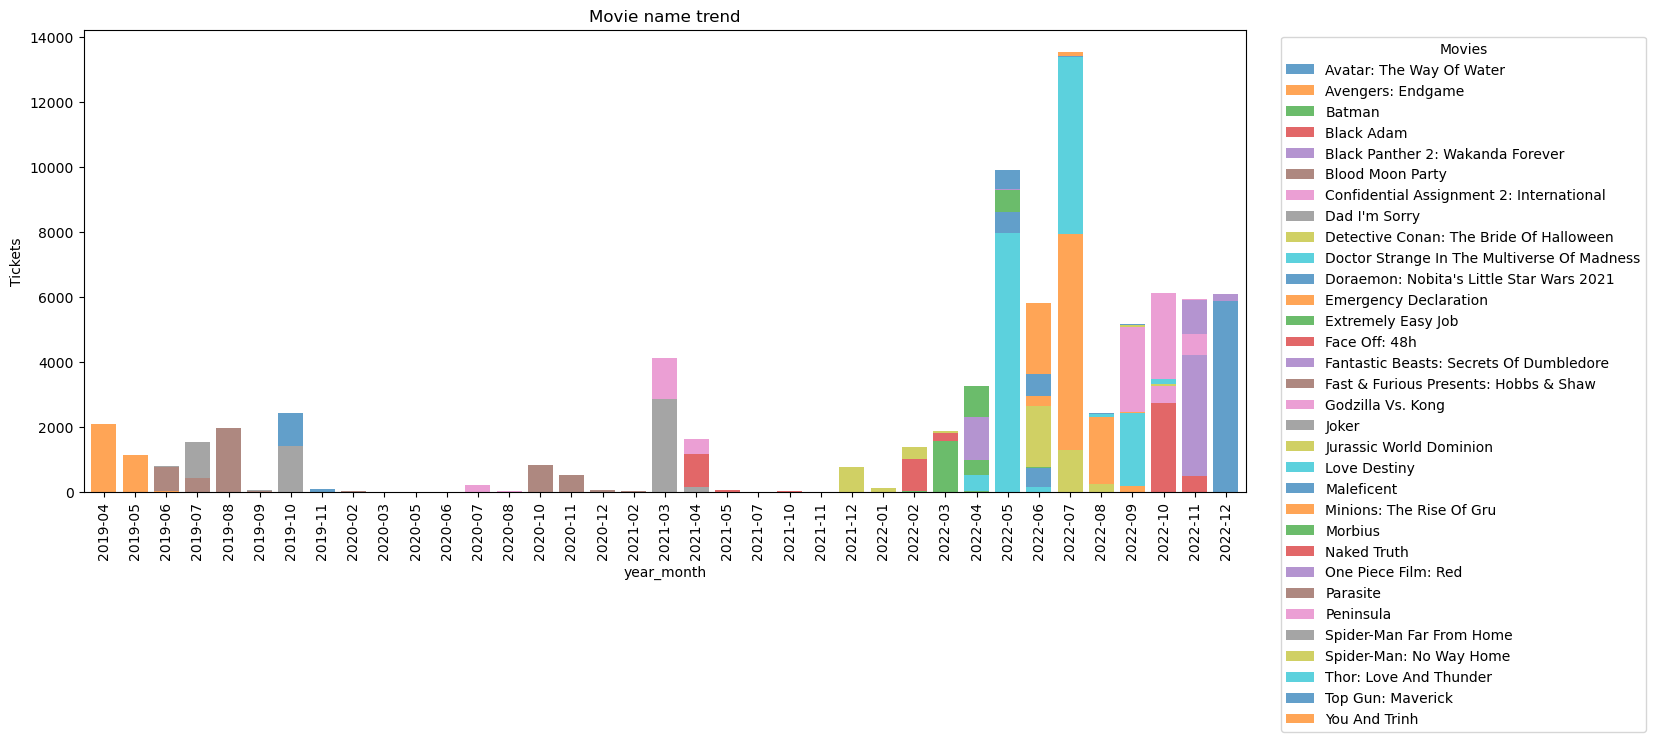

In [102]:
#plot the total ticket of each film
ax = df_film_time_pivot.plot (kind = 'bar', x = 'year_month', stacked = True, figsize = (15,6), width = 0.8, alpha =0.7)

ax.set_title ('Movie name trend')
ax.set_ylabel ('Tickets')

plt.legend (title = 'Movies', loc = 'upper right', bbox_to_anchor = (1.35,1))

plt.show()

# **3 Customer value analysis:**

In [103]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount,12363,33,7,Friday,17,2022-07,IOS,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Order successful,NaN,browser,website,Male,1991-06-09,direct discount,11529,31,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Order successful,NaN,unknown,mobile,Male,1989-05-18,NaN,12281,33,7,Saturday,11,2022-07,unknown,non_promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1997-08-31,direct discount,9254,25,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Order successful,NaN,devicemodel,mobile,Male,1988-09-20,direct discount,12521,34,7,Sunday,18,2022-07,unknown,promotion


**Mission:** Analyze metrics coming from customers
- Frequency: count day, month
 
- Monetary: total_money, total_discount

- Success_rate: number_success / total

- Promotion_rate: number_promotion / total

- discount_rate: sum_discount / sum_money

In [104]:
#Calculate all metrices related to SUCCESSFUL trans of each cus:

def cal_n_promotion (x):
  return (x == 'promotion').sum()

df_success_metric =(
                        df_join_all [df_join_all['status_id']==1]
                        .assign (date = pd.to_datetime(df_join_all['time']).dt.date)
                        .groupby ('customer_id')
                        .agg (
                            n_success = ('ticket_id', 'count'),
                            s_money = ('original_price','sum'),
                            s_discount = ('discount_value', 'sum'),
                            n_days = ('date', 'nunique'),
                            n_month = ('year_month', 'nunique'),
                            n_promotion = ('type',cal_n_promotion)
                        )
                        .reset_index ()
                    )

In [105]:
df_success_metric.head (2)

,customer_id,n_success,s_money,s_discount,n_days,n_month,n_promotion
0,100001,1,7.42,2.06,1,1,1
1,100003,6,60.95,2.56,6,6,1


In [106]:
##Calculate all metrices related to FAIL trans of each cus: total, n_fail
def cal_fail_trans (x):
  return (x!=1).sum()

df_failed_metric =(
                        df_join_all
                        .groupby ('customer_id')
                        .agg (
                            n_total = ('ticket_id', 'count'),
                            n_fail = ('status_id', cal_fail_trans)
                        )
                        .reset_index ()
                    )


In [107]:
df_failed_metric.head (2)

,customer_id,n_total,n_fail
0,100001,1,0
1,100003,6,0


In [108]:
#Merge both success and fail metrics into 1 table
df_cus_value = pd.merge ( df_failed_metric, df_success_metric, how = 'left', on = 'customer_id').fillna (0)

In [109]:
df_cus_value.head ()

,customer_id,n_total,n_fail,n_success,s_money,s_discount,n_days,n_month,n_promotion
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0


In [110]:
#Calculate the rate
df_cus_value ['success_rate'] = df_cus_value ['n_success'] / df_cus_value ['n_total']
df_cus_value ['promotion_rate'] = df_cus_value ['n_promotion'] / df_cus_value ['n_total']
df_cus_value ['discount_rate'] = df_cus_value ['s_discount'] / df_cus_value ['s_money']
df_cus_value ['n_fail'].replace (0 ,np.nan, inplace = True)

In [111]:
df_cus_value.head()

,customer_id,n_total,n_fail,n_success,s_money,s_discount,n_days,n_month,n_promotion,success_rate,promotion_rate,discount_rate
0,100001,1,NaN,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628
1,100003,6,NaN,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002
2,100004,1,NaN,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000
3,100005,1,NaN,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071
4,100006,1,NaN,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000


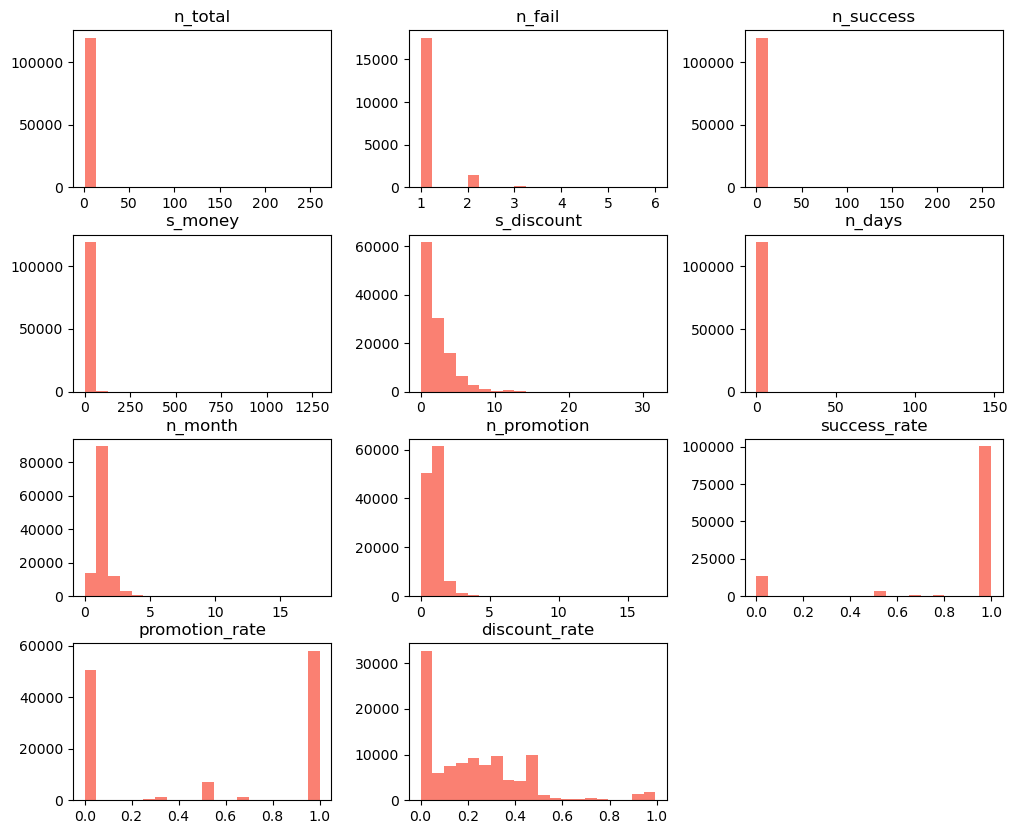

In [112]:
#visualize all metrics by histogram
df_cus_value.iloc[:, 1:].hist (figsize = (12,10), grid = False, color = 'salmon', bins = 20)

plt.show ()

 **Notes:**
- n_total : almost customers bought only 1 ticket --> Also check any chance for ticking spamming or hoarding?
- success_rate: group "0% success" had many customers --> check which fraud was that?
- promotion_rate: there were around 60000 had 100% promotion_rate.
- s_discount: the above rate seems true --> Customers just joined ONLY once --> check retention --> figure the efficiency.


## 3.1 Check cus if they spam ticket or not ?

In [113]:
df_cus_value.sort_values ('n_total', ascending = False) . head (30)

,customer_id,n_total,n_fail,n_success,s_money,s_discount,n_days,n_month,n_promotion,success_rate,promotion_rate,discount_rate
2686,102948,260,NaN,260.0,1291.25,3.38,148.0,18.0,1.0,1.000000,0.003846,0.002618
48948,153588,108,1.0,107.0,434.59,0.00,77.0,14.0,0.0,0.990741,0.000000,0.000000
10604,111644,104,NaN,104.0,581.70,18.52,85.0,18.0,9.0,1.000000,0.086538,0.031838
15783,117362,104,1.0,103.0,744.86,8.62,79.0,15.0,6.0,0.990385,0.057692,0.011573
16687,118349,83,3.0,80.0,344.56,4.21,62.0,17.0,1.0,0.963855,0.012048,0.012218
20907,122962,77,1.0,76.0,447.00,1.86,45.0,9.0,3.0,0.987013,0.038961,0.004161
62432,168132,69,3.0,66.0,249.03,0.00,59.0,14.0,0.0,0.956522,0.000000,0.000000
72718,179471,69,1.0,68.0,375.91,7.14,51.0,9.0,4.0,0.985507,0.057971,0.018994
53097,158089,53,2.0,51.0,245.14,1.69,40.0,14.0,2.0,0.962264,0.037736,0.006894
111563,222641,51,NaN,51.0,240.84,2.31,41.0,11.0,3.0,1.000000,0.058824,0.009591


In [114]:
#take massive ticket cus ticket history
mass_cus = list (df_cus_value[df_cus_value['n_success'] > 30]['customer_id'])
df_mass_cus_history = df_join_all [df_join_all ['customer_id'].isin (mass_cus)]

In [115]:
#pivot table to take the year_month and how much ticket for each cus in that time
df_mass_cus_history_pivot = (
                        df_mass_cus_history
                        .pivot_table (index = 'year_month', columns = 'customer_id', aggfunc = 'count', values = 'ticket_id')
                        .reset_index ()
)
df_mass_cus_history_pivot

customer_id,year_month,102948,103035,103347,108110,108162,108729,111644,114205,117140,117362,117475,118349,122962,131905,153124,153588,158089,168132,179471,222641,226527,226886
0,2019-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,2019-05,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
5,2019-06,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1.0,1.0,NaN,1.0,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
6,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
7,2019-08,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
8,2019-09,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
9,2019-10,NaN,4.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


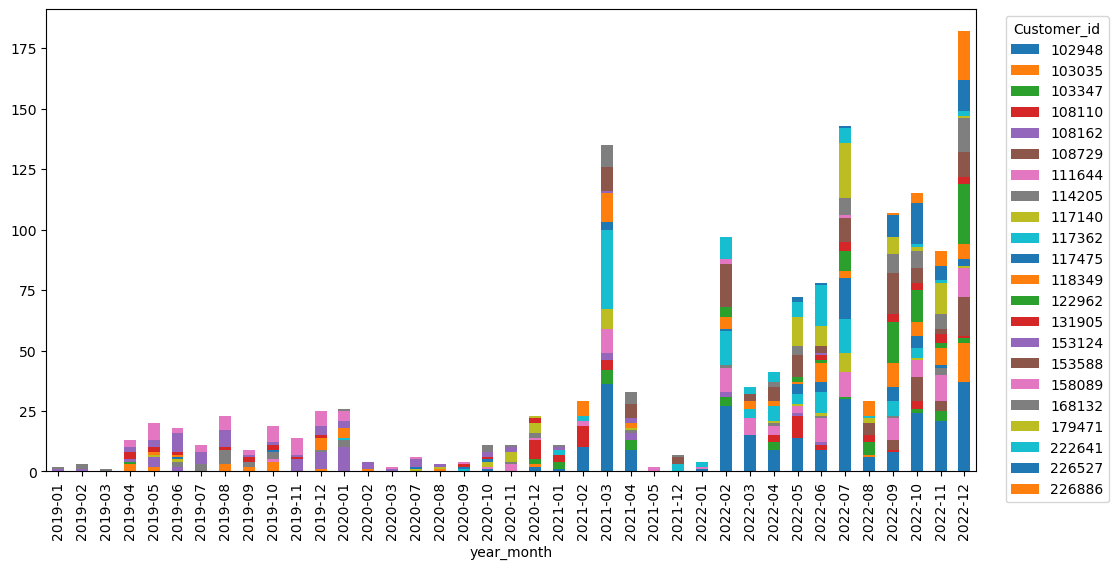

In [116]:
#plot stacked bar chart to visualize
df_mass_cus_history_pivot.plot ( kind = 'bar', x = 'year_month', stacked = True, figsize = (12,6))
plt.legend (title = 'Customer_id', bbox_to_anchor = (1.15, 1))
plt.show ()

Check thoroughly the customer with id 117362.










In [117]:
df_check_cus_117362 = df_join_all [df_join_all ['customer_id'] == 117362]
df_check_cus_117362

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month,os_version,type
3164,e61047e7dad27c5ce73dc646e983f458,117362,money in app,160.0,33868658d8fb32531b706590a91bb6cc,8.41,0.0,8.41,2022-07-04 14:45:36.424,1,0,Thor: Love And Thunder,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,7,Monday,14,2022-07,Android & others,non_promotion
3165,e2d5a38fe55cff6bbbed71b0bb94f993,117362,bank account,119.0,33868658d8fb32531b706590a91bb6cc,3.42,0.0,3.42,2022-07-10 20:09:14.752,1,0,Thor: Love And Thunder,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,7,Sunday,20,2022-07,Android & others,non_promotion
3166,e41f57671abdb96b23f266edd9011e8f,117362,money in app,109.0,33868658d8fb32531b706590a91bb6cc,14.02,0.0,14.02,2022-07-11 23:51:13.752,1,0,Thor: Love And Thunder,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,7,Monday,23,2022-07,Android & others,non_promotion
3167,b9a6f9216beccf45c66ca74c23ac7f1d,117362,money in app,160.0,33868658d8fb32531b706590a91bb6cc,12.37,0.0,12.37,2022-07-08 22:01:29.778,1,0,Thor: Love And Thunder,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,7,Friday,22,2022-07,Android & others,non_promotion
3168,c9dfe3a2bfeea857516c67578a3022c2,117362,money in app,143.0,33868658d8fb32531b706590a91bb6cc,6.60,0.0,6.60,2022-07-14 23:49:37.413,1,0,Thor: Love And Thunder,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,7,Thursday,23,2022-07,Android & others,non_promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146540,69f401eeacc3fe4398276cd0b480fa96,117362,bank account,152.0,33868658d8fb32531b706590a91bb6cc,13.69,0.0,13.69,2022-04-03 13:27:18.092,1,0,The Bad Guys,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,4,Sunday,13,2022-04,Android & others,non_promotion
147986,bcb6c760b8daf532f59b43f73ea5367b,117362,money in app,109.0,33868658d8fb32531b706590a91bb6cc,5.77,0.0,5.77,2021-03-21 20:23:30.462,1,0,Harry Potter And The Deathly Hallows,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,3,Sunday,20,2021-03,Android & others,non_promotion
151448,5df989551894ee82e1bf85f725d19eda,117362,money in app,51.0,33868658d8fb32531b706590a91bb6cc,2.72,0.0,2.72,2021-01-10 19:31:15.337,1,0,Em La Cua Em,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,1,Sunday,19,2021-01,Android & others,non_promotion
151449,77bae9d863e549bec03494053ad9376a,117362,bank account,109.0,33868658d8fb32531b706590a91bb6cc,4.12,0.0,4.12,2021-01-25 20:01:50.340,1,0,Em La Cua Em,Order successful,NaN,Realme RMX2121,mobile,Male,1999-08-23,NaN,8532,23,1,Monday,20,2021-01,Android & others,non_promotion


The buying history of customer 117362 is reasonable with tickets bought in seperate date and movies.

**NOTE:**
- There no exists of ticket spamming or hoarding.

## 3.2 Massive promotion check:

In [118]:
df_cus_value.head (2)

,customer_id,n_total,n_fail,n_success,s_money,s_discount,n_days,n_month,n_promotion,success_rate,promotion_rate,discount_rate
0,100001,1,NaN,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628
1,100003,6,NaN,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002


In [119]:
#label for the massive promotion
df_cus_value ['promotion_type'] = df_cus_value ['n_promotion'].apply (lambda x: 'more than 10' if x > 10 else str(x))

In [120]:
#quick snapshot about n_promotion with its number of cus
df_cus_promotion =(df_cus_value[df_cus_value['n_promotion'] > 0].groupby ('n_promotion'). agg (total_cus = ('customer_id','nunique')).reset_index ())
df_cus_promotion

,n_promotion,total_cus
0,1.0,61334
1,2.0,6264
2,3.0,1042
3,4.0,230
4,5.0,74
5,6.0,19
6,7.0,10
7,8.0,2
8,9.0,2
9,10.0,1


In [121]:
#Pivot table for each type of promotion
df_cus_promotion_type_pivot = (
                                df_join_all[(df_join_all ['status_id'] == 1) & (df_join_all ['type'] == 'promotion')]
                                .pivot_table (index = 'customer_id', columns = 'campaign_type', aggfunc = 'count', values = 'ticket_id' )
                                .reset_index ()
)
df_cus_promotion_type_pivot

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN
...,...,...,...,...
68974,231393,NaN,NaN,1.0
68975,231395,1.0,NaN,NaN
68976,231397,NaN,NaN,1.0
68977,231398,NaN,NaN,1.0


In [122]:
#Table of number promotion with its number of cases in each types of promotion.
df_cus_promotion =(pd.merge (df_cus_promotion_type_pivot, df_cus_value, how = 'inner', on ='customer_id')
                   .groupby ('n_promotion')
                   .agg (total_cus = ('customer_id','nunique'),
                         n_direct_discount = ('direct discount', 'sum'),
                         n_reward_point = ('reward point', 'sum'),
                         n_voucher = ('voucher', 'sum') )
                   .reset_index ())
df_cus_promotion

,n_promotion,total_cus,n_direct_discount,n_reward_point,n_voucher
0,1.0,61334,53098.0,2878.0,5358.0
1,2.0,6264,11222.0,215.0,1091.0
2,3.0,1042,2788.0,45.0,293.0
3,4.0,230,827.0,6.0,87.0
4,5.0,74,323.0,4.0,43.0
5,6.0,19,102.0,0.0,12.0
6,7.0,10,54.0,2.0,14.0
7,8.0,2,14.0,0.0,2.0
8,9.0,2,12.0,0.0,6.0
9,10.0,1,9.0,0.0,1.0


In [123]:
#Calculate the percentage of each type of promotion
df_cus_promotion ['total_discount'] = df_cus_promotion.iloc [:, 2:5].sum (axis = 1)

for i in df_cus_promotion.columns [2:5]:
  df_cus_promotion[i +'_pct'] = df_cus_promotion[i]/ df_cus_promotion['total_discount']
  
df_cus_promotion.head()

,n_promotion,total_cus,n_direct_discount,n_reward_point,n_voucher,total_discount,n_direct_discount_pct,n_reward_point_pct,n_voucher_pct
0,1.0,61334,53098.0,2878.0,5358.0,61334.0,0.865719,0.046923,0.087358
1,2.0,6264,11222.0,215.0,1091.0,12528.0,0.895754,0.017162,0.087085
2,3.0,1042,2788.0,45.0,293.0,3126.0,0.891875,0.014395,0.093730
3,4.0,230,827.0,6.0,87.0,920.0,0.898913,0.006522,0.094565
4,5.0,74,323.0,4.0,43.0,370.0,0.872973,0.010811,0.116216


In [124]:
#format the percentage
format_dict = {'n_promotion': '{:.0f}', 'total_discount': '{:.0f}', 'n_direct_discount_pct': '{:.1%}', 'n_reward_point_pct': '{:.1%}', 'n_voucher_pct': '{:.1%}'}


In [125]:
(
df_cus_promotion
.drop (columns = ['n_direct_discount',	'n_reward_point',	'n_voucher'])
.style
.format (format_dict)
.background_gradient (subset = ['n_direct_discount_pct', 'n_reward_point_pct', 'n_voucher_pct'], cmap = 'PuBu')
.background_gradient (subset = ['total_discount'], cmap = 'Greens')
)

,n_promotion,total_cus,total_discount,n_direct_discount_pct,n_reward_point_pct,n_voucher_pct
0,1,61334,61334,86.6%,4.7%,8.7%
1,2,6264,12528,89.6%,1.7%,8.7%
2,3,1042,3126,89.2%,1.4%,9.4%
3,4,230,920,89.9%,0.7%,9.5%
4,5,74,370,87.3%,1.1%,11.6%
5,6,19,114,89.5%,0.0%,10.5%
6,7,10,70,77.1%,2.9%,20.0%
7,8,2,16,87.5%,0.0%,12.5%
8,9,2,18,66.7%,0.0%,33.3%
9,10,1,10,90.0%,0.0%,10.0%


**NOTE:**

* direct_discount was used most (90% cus).
* n_promotion = 1 has 60k, however, just 12k for n_promotion = 2 --> check retention of cus --> effectiveness of mkt ?

In [126]:
import seaborn as sns
sns.__version__

'0.13.2'

/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel_16086/2003360845.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel_16086/2003360845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel

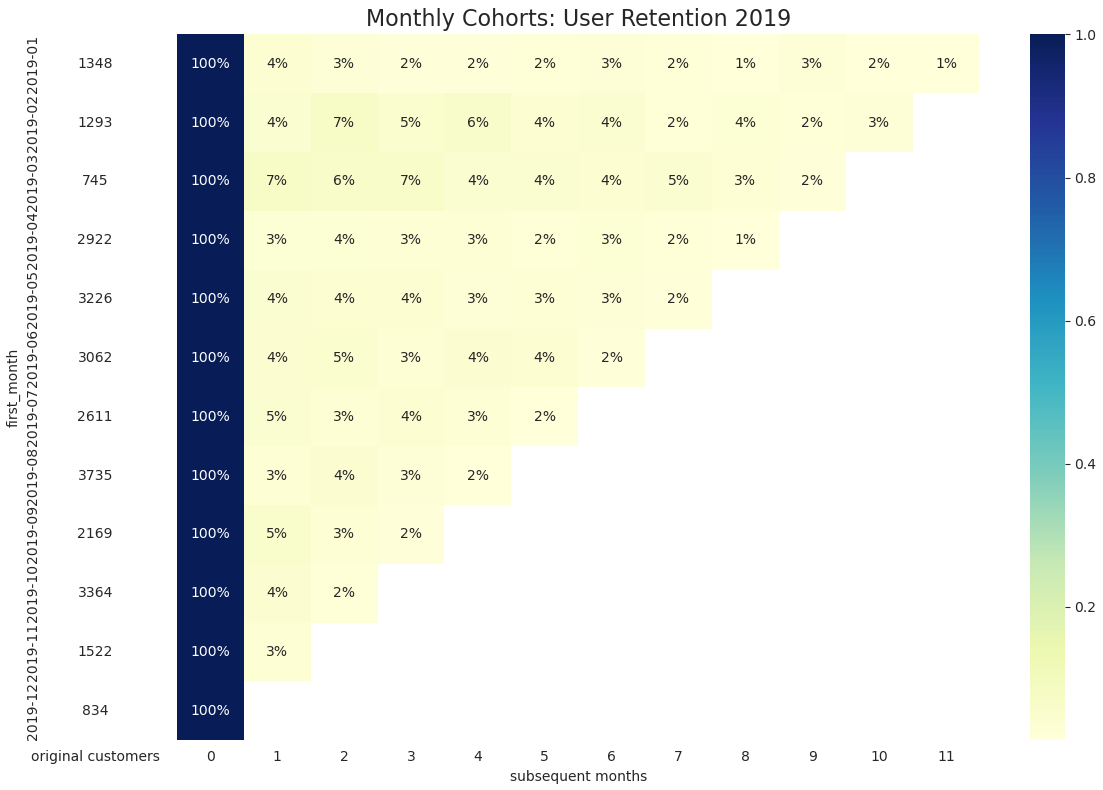

In [127]:
### FOR seaborn version = '0.13.2' ###

## RENTIONAL OF 2019

from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

#Calculate cohort (first_month), current_month, subsequent month

df_selected_time = df_join_all[ (df_join_all['time'] < '2020-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

#Group by cohort

df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

#Pivot table
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

#Transfer to %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

#Plot cohort graph
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(), #Delete null cell
                annot=True,	#show value of that cell
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()
    
plt.show ()



/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel_16086/3252642502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel_16086/3252642502.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
/var/folders/lh/5ys4jvd53ll2twtzg4wzzp500000gn/T/ipykernel

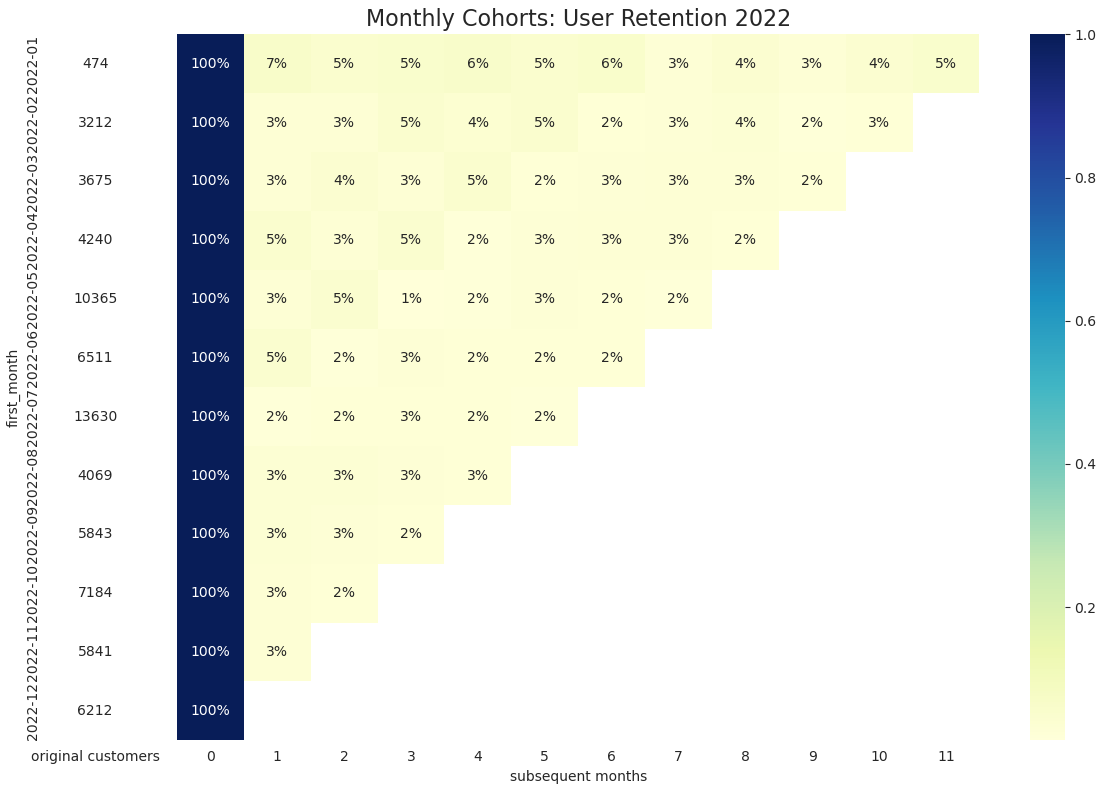

In [ ]:
## RENTIONAL OF 2022

#Calculate cohort (first_month), current_month, subsequent month

df_selected_time = df_join_all[ (df_join_all['time'] > '2022-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

#Group by cohort

df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

# Pivot table
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

#Transfer to %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

##Plot cohort graph
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(), #Delete null cell
                annot=True,	#show value of that cell
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()
    
plt.show ()


**NOTE:**
- The retention rate was really low --> likely they just came for discount then not going back --> Should have appropriate approach and marketing campaign such as a discount when coming back to have loyal customers.

## 3.4 Why many cus fail in order ? Which fraud ?

In [129]:
df_join_all.head (2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,description,error_group,model,platform,usergender,dob,campaign_type,age_date,age,month,day_name,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Order successful,NaN,"iPhone13,1",mobile,Male,1989-02-25,direct discount,12363,33,7,Friday,17,2022-07,IOS,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Order successful,NaN,browser,website,Male,1991-06-09,direct discount,11529,31,7,Friday,20,2022-07,browser,promotion


In [130]:
# failed ticket his
df_failed_cus = df_join_all [df_join_all ['status_id'] != 1].copy()

In [131]:
df_failed_cus ['error_group'].unique ()

array(['external', 'customer', 'internal'], dtype=object)

In [132]:
df_error = (df_failed_cus.groupby ('error_group')
            .agg(total_ticket = ('ticket_id','count'),
                total_cus = ('customer_id','nunique') )
            )
df_error

,total_ticket,total_cus
error_group,,
customer,5112,4855
external,15683,14488
internal,251,218


In [133]:
#Pivot table for error_group by time
df_error_pivot = (
    df_failed_cus
    .pivot_table (index = 'year_month', columns = 'error_group', aggfunc = 'count', values = 'ticket_id')
    .reset_index ()
)
df_error_pivot.head ()

error_group,year_month,customer,external,internal
0,2019-01,291.0,369.0,NaN
1,2019-02,66.0,133.0,NaN
2,2019-03,44.0,94.0,NaN
3,2019-04,331.0,548.0,NaN
4,2019-05,297.0,516.0,NaN


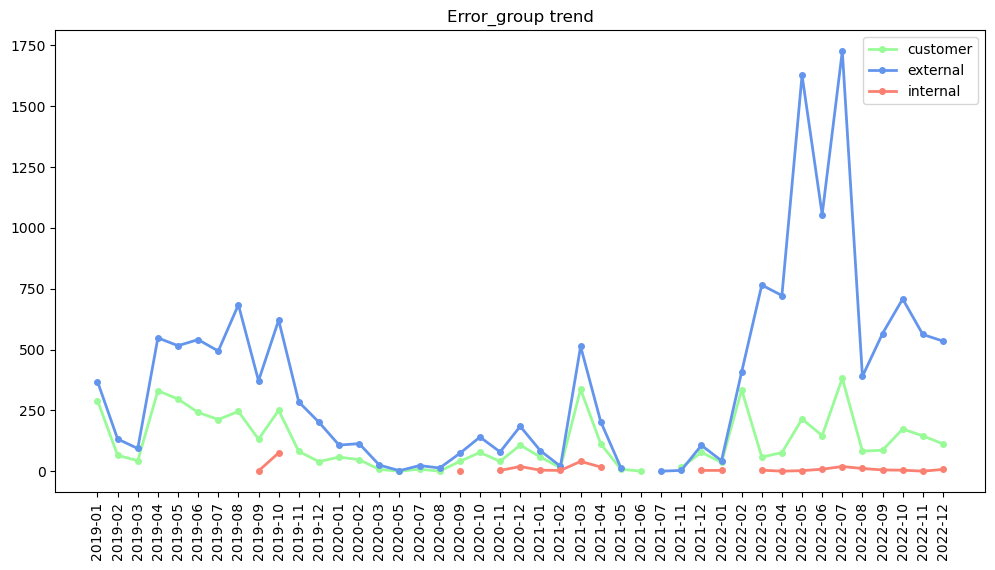

In [134]:
#plot line chart of each error by time
plt.figure (figsize = (12,6))

error_color = [['customer', 'palegreen'],['external', 'cornflowerblue'],['internal', 'salmon']]

for error, color in error_color:
  plt.plot (df_error_pivot['year_month'],df_error_pivot[error], label = error ,color = color, marker = 'o', ms = 4, linewidth = 2)

plt.title ('Error_group trend')
plt.xticks (rotation = 90)
plt.legend ()
plt.show ()

**Note:**

* A significant number of error in external occured in the mid of 2022 --> check what error ?

In [135]:
#Pivot table for detailed error_group by time

df_description_pivot = (
    df_failed_cus
    .pivot_table (index = 'year_month', columns = 'description', aggfunc = 'count', values = 'ticket_id')
    .reset_index ()
)
df_description_pivot.rename (columns = {
                            'Insufficient funds in customer account. Please add more funds and try the transaction again.' : 'Insufficient funds'
                            , 'Need verify your account to continue' : 'Need verify'
                            , 'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.': 'Password locked'
                            }, inplace = True)
df_description_pivot.head ()

description,year_month,Insufficient funds,Need verify,No response from your bank,Password locked,Payment failed from bank,Payment overdue,Transaction temporarily limited
0,2019-01,217.0,NaN,228.0,56.0,141.0,18.0,NaN
1,2019-02,42.0,NaN,67.0,11.0,66.0,13.0,NaN
2,2019-03,26.0,NaN,50.0,8.0,44.0,10.0,NaN
3,2019-04,205.0,NaN,289.0,54.0,259.0,72.0,NaN
4,2019-05,198.0,NaN,273.0,60.0,243.0,39.0,NaN


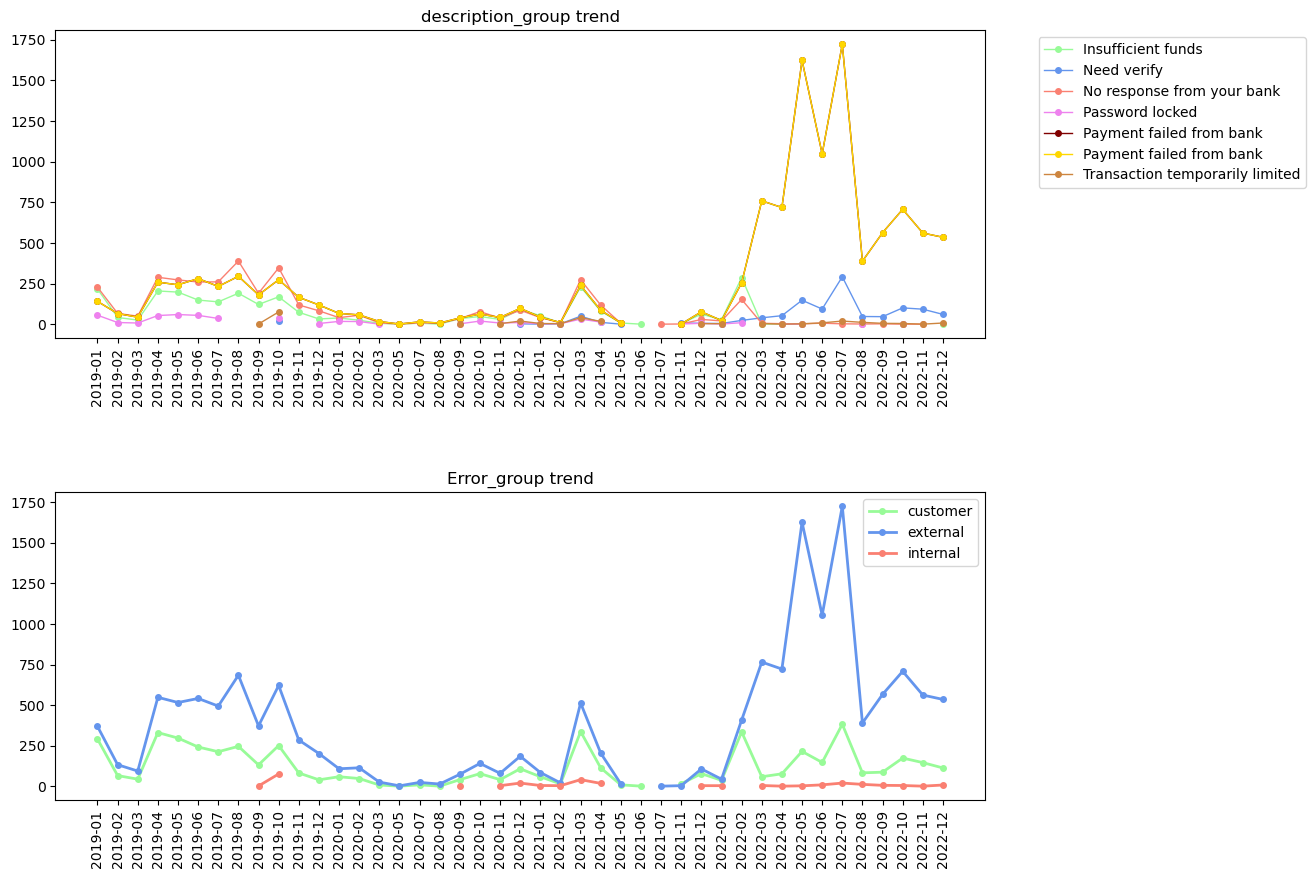

In [136]:
#plot line chart of each error by time
plt.figure (figsize = (12,10))

ax1 = plt.subplot (2,1,1)
error_color = [['Insufficient funds', 'palegreen']
               ,['Need verify', 'cornflowerblue']
               ,['No response from your bank', 'salmon']
               ,['Password locked', 'violet']
               ,['Payment failed from bank', 'maroon']
               ,['Payment failed from bank', 'gold']
               ,['Transaction temporarily limited', 'peru']]

for error, color in error_color:
  plt.plot (df_description_pivot['year_month'],df_description_pivot[error], label = error ,color = color, marker = 'o', ms = 4, linewidth = 1)

plt.title ('description_group trend')
plt.xticks (rotation = 90)
plt.legend (bbox_to_anchor = (1.05,1))


ax2 = plt.subplot (2,1,2)

error_color = [['customer', 'palegreen'],['external', 'cornflowerblue'],['internal', 'salmon']]

for error, color in error_color:
  plt.plot (df_error_pivot['year_month'],df_error_pivot[error], label = error ,color = color, marker = 'o', ms = 4, linewidth = 2)

plt.title ('Error_group trend')
plt.xticks (rotation = 90)
plt.legend ()

plt.subplots_adjust (hspace = 0.5)
plt.show ()


**NOTE:**

* 'Payment failed from bank' held a significant number of external error:
    1. The bank is in upgrade in that season.
    2. There was a fraud in bank system.

* 'Need varify' accounted for 'customer' error:
    1. Cus was found for a cheat or sth wrong ?

--> Internal Fraud was limited so that we could change the bank if sth wrong and check if there were any errors for verify cus through the system.